In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tuner-results/fairness_metrics.csv
/kaggle/input/tuner-results/model_metrics.csv
/kaggle/input/tuner-results/model_performance.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import linprog


In [3]:
results = pd.read_csv("/kaggle/input/tuner-results/model_performance.csv")
fair_results = pd.read_csv("/kaggle/input/tuner-results/fairness_metrics.csv")
model_metrics = pd.read_csv("/kaggle/input/tuner-results/model_metrics.csv")
model_metrics

model configuration  accuracy  total_params  trainable_params  \
0    MLP        64-256    0.8900         65839             21775   
1    MLP        32-256    0.8389         40111             13199   
2    MLP        64-128    0.8964         34095             11279   
3    MLP        256-64    0.9007         61999             20623   
4    MLP        256-32    0.8844         35631             11855   
..   ...           ...       ...           ...               ...   
64   CNN        128-32    0.8199         66607             22095   
65   CNN         32-32    0.8488         18031              5967   
66   CNN         32-64    0.8440         35183             11663   
67   CNN         64-64    0.8795         66735             22159   
68   CNN         64-32    0.8532         34223             11343   

    non_trainable_params  optimizer_params  total_params_excluding_optimizer  
0                    512             43552                             22287  
1                    512             26400                             13711  
2                    256             22560                             11535  
3                    128             41248                             20751  
4                     64             23712                             11919  
..                   ...               ...                               ...  
64                   320             44192                             22415  
65                   128             11936                              6095  
66                   192             23328                             11855  
67                   256             44320                             22415  
68                   192             22688                             11535  

[69 rows x 8 columns]

In [4]:
# Create separate DataFrames for each model type
mlp_df = model_metrics[model_metrics["model"] == "MLP"][["accuracy", "configuration", "trainable_params", "non_trainable_params","optimizer_params", "total_params", "total_params_excluding_optimizer"]]
gru_df = model_metrics[model_metrics["model"] == "GRU"][["accuracy", "configuration", "trainable_params", "non_trainable_params","optimizer_params", "total_params", "total_params_excluding_optimizer"]]
lstm_df = model_metrics[model_metrics["model"] == "LSTM"][["accuracy", "configuration", "trainable_params", "non_trainable_params","optimizer_params", "total_params", "total_params_excluding_optimizer"]]
rnn_df = model_metrics[model_metrics["model"] == "RNN"][["accuracy", "configuration", "trainable_params", "non_trainable_params","optimizer_params", "total_params", "total_params_excluding_optimizer"]]
cnn_df = model_metrics[model_metrics["model"] == "CNN"][["accuracy", "configuration", "trainable_params", "non_trainable_params","optimizer_params", "total_params", "total_params_excluding_optimizer"]]

# Displaying one of the DataFrames as an example
cnn_df

accuracy configuration  trainable_params  non_trainable_params  \
57    0.9062        32-256             45839                   576   
58    0.9023        64-128             43791                   384   
59    0.8828        256-64             43151                   384   
60    0.8063        256-32             22095                   320   
61    0.9084       128-256             87055                   640   
62    0.8941        32-128             23055                   320   
63    0.8811       256-128             85263                   512   
64    0.8199        128-32             22095                   320   
65    0.8488         32-32              5967                   128   
66    0.8440         32-64             11663                   192   
67    0.8795         64-64             22159                   256   
68    0.8532         64-32             11343                   192   

    optimizer_params  total_params  total_params_excluding_optimizer  
57             91680        138095                             46415  
58             87584        131759                             44175  
59             86304        129839                             43535  
60             44192         66607                             22415  
61            174112        261807                             87695  
62             46112         69487                             23375  
63            170528        256303                             85775  
64             44192         66607                             22415  
65             11936         18031                              6095  
66             23328         35183                             11855  
67             44320         66735                             22415  
68             22688         34223                             11535

In [5]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.



Analysis for MLP Model
Optimal configuration: 128-128 (ID: 14)
Accuracy: 0.9066
Parameters: 20495

Analysis for GRU Model
Optimal configuration: 128-32 (ID: 38)
Accuracy: 0.9580
Parameters: 55055

Analysis for LSTM Model
Optimal configuration: 128-128 (ID: 29)
Accuracy: 0.9601
Parameters: 85519

Analysis for RNN Model
Optimal configuration: 128-256 (ID: 50)
Accuracy: 0.9535
Parameters: 54543

Analysis for CNN Model
Optimal configuration: 32-256 (ID: 57)
Accuracy: 0.9062
Parameters: 46415
Combined visualizations successfully created!


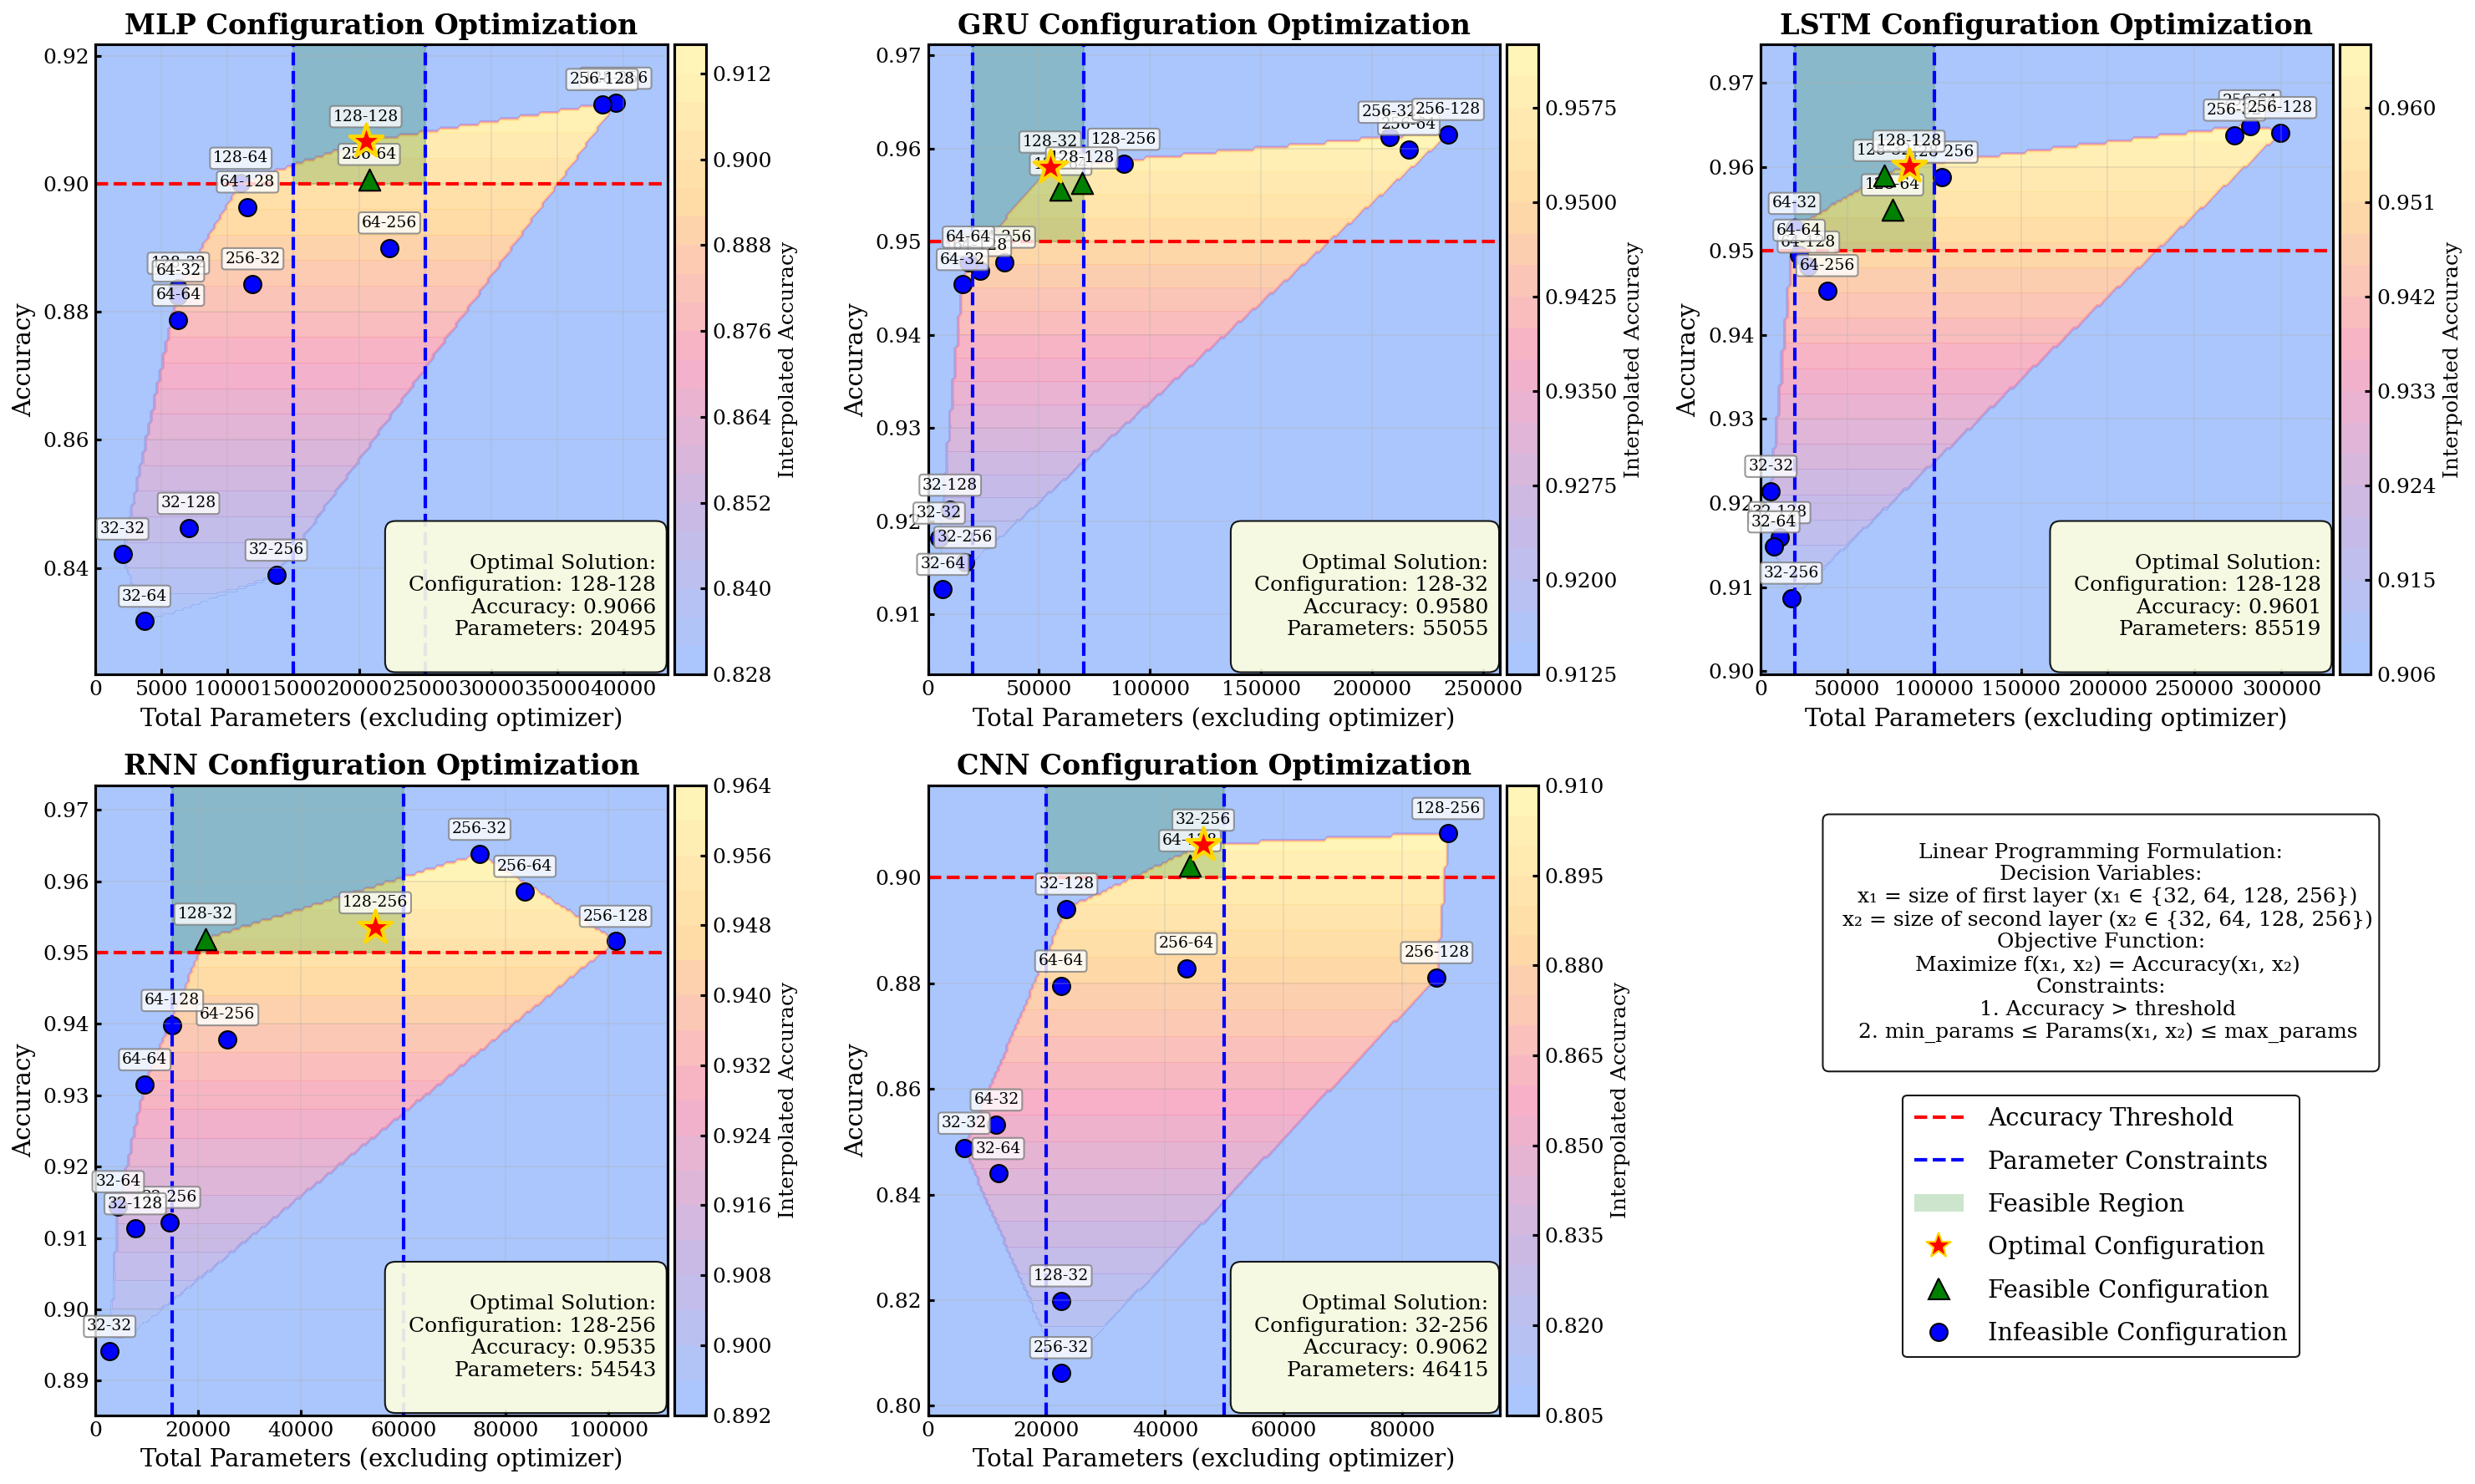

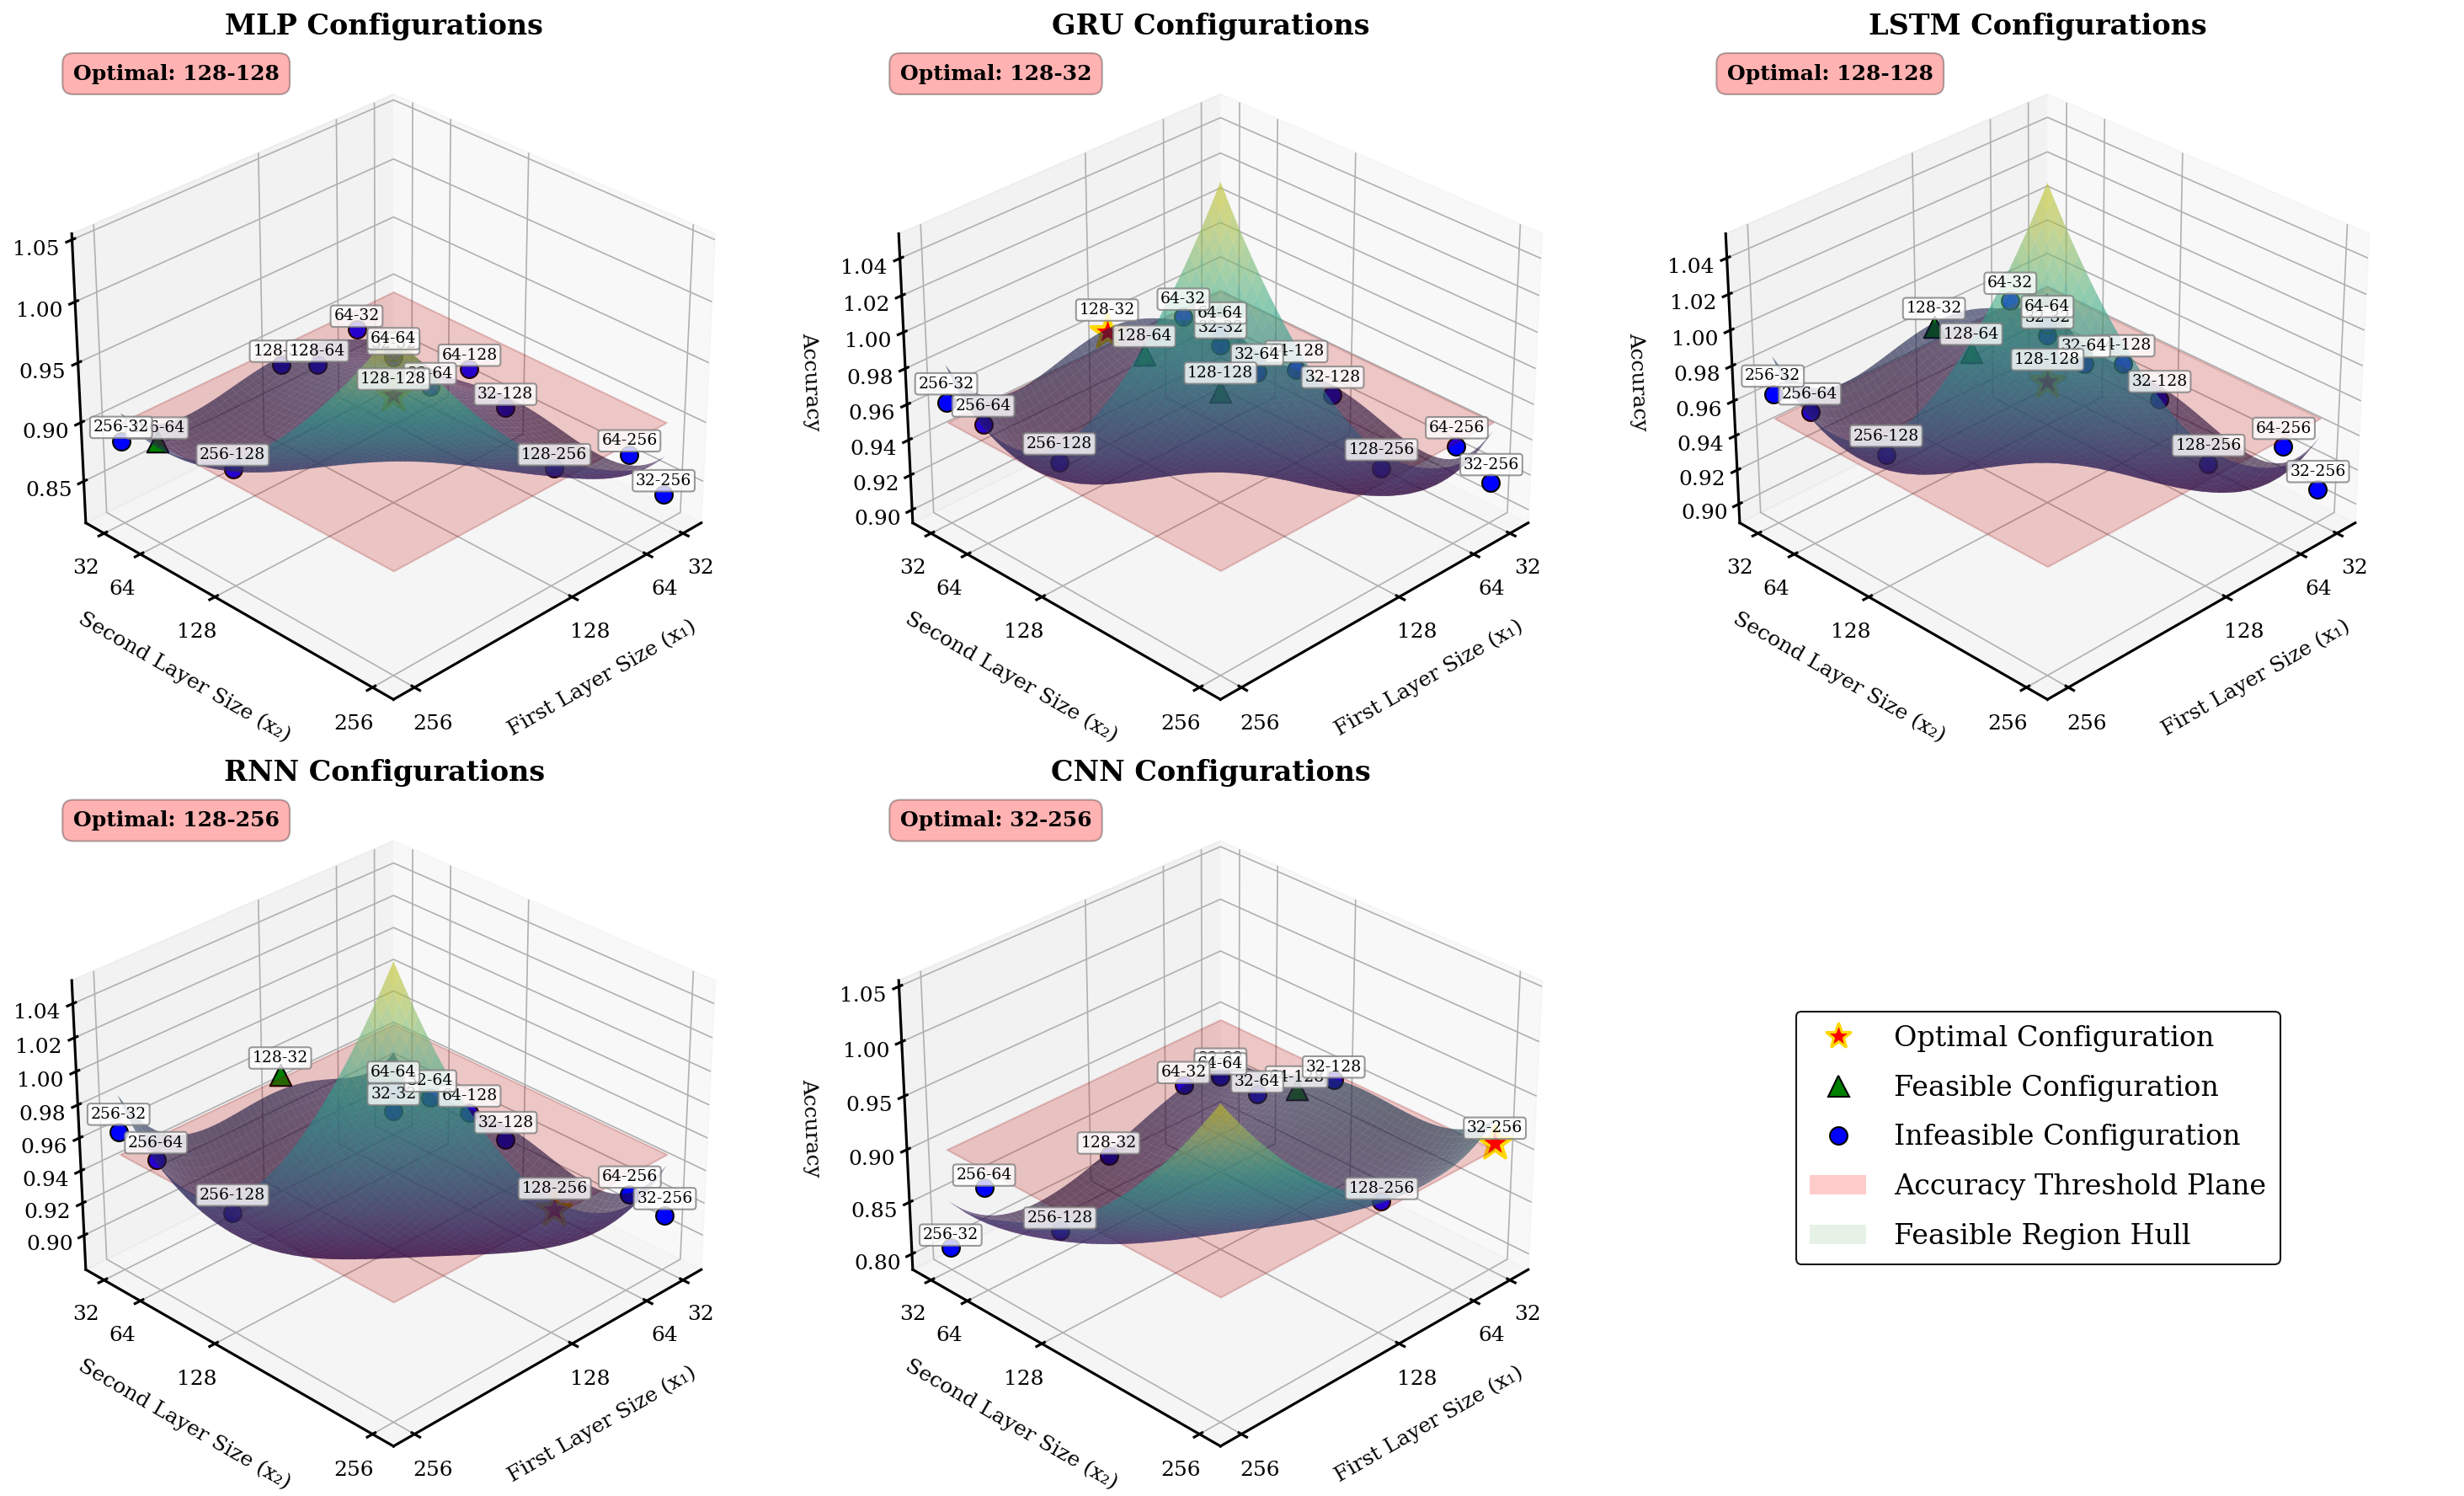

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
from scipy.interpolate import griddata, Rbf
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize, LightSource
from scipy.spatial import ConvexHull
import matplotlib.patheffects as PathEffects
from matplotlib import cm
from matplotlib.lines import Line2D
import numpy as np

# Set the visual style for publication quality
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = 150

# Function to extract layer sizes from config string (assuming format like "64-128")
def extract_layer_sizes(df):
    df[['layer1', 'layer2']] = df['configuration'].str.split('-', expand=True).astype(int)
    return df

# Define constraints for each model
model_constraints = {
    'mlp': {'min_accuracy': 0.9, 'min_params': 15000, 'max_params': 25000, 'title': 'MLP'},
    'gru': {'min_accuracy': 0.95, 'min_params': 20000, 'max_params': 70000, 'title': 'GRU'},
    'lstm': {'min_accuracy': 0.95, 'min_params': 20000, 'max_params': 100000, 'title': 'LSTM'},
    'rnn': {'min_accuracy': 0.95, 'min_params': 15000, 'max_params': 60000, 'title': 'RNN'},
    'cnn': {'min_accuracy': 0.9, 'min_params': 20000, 'max_params': 50000, 'title': 'CNN'}
}

# Function to find optimal configuration
def find_optimal_config(df, min_accuracy, min_params, max_params):
    df['feasible'] = ((df['accuracy'] > min_accuracy) & 
                      (df['total_params_excluding_optimizer'] >= min_params) & 
                      (df['total_params_excluding_optimizer'] <= max_params))
    
    feasible_df = df[df['feasible']]
    if feasible_df.empty:
        return None
    
    optimal_idx = feasible_df['accuracy'].idxmax()
    return df.loc[optimal_idx]

# NEW FUNCTION: Create combined 2D constraint plot
def create_combined_2d_constraint_plot(model_dfs):
    fig = plt.figure(figsize=(20, 12))
    axs = []
    
    # Create a 2x3 grid (5 plots + legend)
    for i, (model_name, df) in enumerate(model_dfs.items()):
        ax = plt.subplot(2, 3, i+1)
        axs.append(ax)
        
        constraints = model_constraints[model_name]
        min_accuracy = constraints['min_accuracy']
        min_params = constraints['min_params']
        max_params = constraints['max_params']
        
        df = extract_layer_sizes(df)
        optimal_config = find_optimal_config(df, min_accuracy, min_params, max_params)
        
        if optimal_config is None:
            plt.text(0.5, 0.5, f"No feasible configurations for {constraints['title']}", 
                    transform=ax.transAxes, fontsize=14, ha='center')
            continue
        
        # Create a gradient background for accuracy
        x_mesh = np.linspace(0, df['total_params_excluding_optimizer'].max() * 1.1, 200)
        y_mesh = np.linspace(df['accuracy'].min() * 0.99, df['accuracy'].max() * 1.01, 200)
        X_mesh, Y_mesh = np.meshgrid(x_mesh, y_mesh)
        
        # Interpolate accuracy values
        points = df[['total_params_excluding_optimizer', 'accuracy']].values
        values = df['accuracy'].values
        Z_mesh = griddata(points, values, (X_mesh, Y_mesh), method='cubic', fill_value=df['accuracy'].min())
        
        # Create a custom colormap
        cmap = LinearSegmentedColormap.from_list('accuracy_cmap', 
                                                ['#82b1ff', '#b39ddb', '#f48fb1', '#ffcc80', '#fff59d'], 
                                                N=256)
        
        # Plot the interpolated accuracy background with colorbar
        contour = ax.contourf(X_mesh, Y_mesh, Z_mesh, 20, cmap=cmap, alpha=0.7)
        plt.colorbar(contour, ax=ax, label='Interpolated Accuracy', 
                    orientation='vertical', pad=0.01, aspect=20)
        
        # Draw constraint boundaries
        ax.axhline(y=min_accuracy, color='red', linestyle='--', linewidth=2)
        ax.axvline(x=min_params, color='blue', linestyle='--', linewidth=2)
        ax.axvline(x=max_params, color='blue', linestyle='--', linewidth=2)
        
        # Highlight the feasible region
        feasible_x = [min_params, max_params, max_params, min_params]
        feasible_y = [min_accuracy, min_accuracy, df['accuracy'].max() * 1.01, df['accuracy'].max() * 1.01]
        ax.fill(feasible_x, feasible_y, color='green', alpha=0.2)
        
        # Define constraint points without vertex labels
        constraint_points = [
            (min_params, min_accuracy),  # Bottom-left
            (max_params, min_accuracy),  # Bottom-right
        ]
        
        # First plot all points without labels
        for j, row in df.iterrows():
            if row['feasible'] and j == optimal_config.name:
                # Optimal config
                ax.scatter(row['total_params_excluding_optimizer'], row['accuracy'], 
                           marker='*', s=400, color='red', edgecolor='gold', linewidth=2, zorder=10)
            elif row['feasible']:
                # Feasible configs
                ax.scatter(row['total_params_excluding_optimizer'], row['accuracy'],
                           marker='^', s=150, color='green', edgecolor='black', linewidth=1, zorder=5)
            else:
                # Infeasible configs
                ax.scatter(row['total_params_excluding_optimizer'], row['accuracy'],
                           marker='o', s=100, color='blue', edgecolor='black', linewidth=1, zorder=1)
        
        # Then add labels separately to ensure they match the points
        for j, row in df.iterrows():
            # Add only the configuration (not the index number)
            ax.annotate(f"{row['configuration']}", 
                        (row['total_params_excluding_optimizer'], row['accuracy']),
                        xytext=(0, 10), textcoords='offset points', fontsize=9,
                        ha='center', va='bottom',
                        bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.8, ec='gray'))
        
        ax.set_title(f'{constraints["title"]} Configuration Optimization', fontsize=16, fontweight='bold')
        ax.set_xlabel('Total Parameters (excluding optimizer)', fontsize=14)
        ax.set_ylabel('Accuracy', fontsize=14)
        ax.grid(True, alpha=0.3)
        
        # Add optimal solution details without ID
        solution_text = f"""
Optimal Solution:
  Configuration: {optimal_config['configuration']}
  Accuracy: {optimal_config['accuracy']:.4f}
  Parameters: {optimal_config['total_params_excluding_optimizer']}
        """
        ax.text(0.98, 0.02, solution_text, transform=ax.transAxes, fontsize=12,
            ha='right', va='bottom', bbox=dict(facecolor='lightyellow', alpha=0.9, 
                                           boxstyle='round,pad=0.5', edgecolor='black'))
    
    # Use the last subplot area for the legend
    legend_ax = plt.subplot(2, 3, 6)
    legend_ax.axis('off')  # Hide the axes
    
    # Create legend elements
    legend_elements = [
        Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='Accuracy Threshold'),
        Line2D([0], [0], color='blue', linestyle='--', linewidth=2, label='Parameter Constraints'),
        plt.Rectangle((0, 0), 1, 1, fc='green', alpha=0.2, label='Feasible Region'),
        Line2D([0], [0], marker='*', color='w', markerfacecolor='red', markeredgecolor='gold',
               markersize=15, label='Optimal Configuration'),
        Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markeredgecolor='black',
               markersize=12, label='Feasible Configuration'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markeredgecolor='black',
               markersize=10, label='Infeasible Configuration')
    ]
    
    # Add formulation text above the legend but not too high
    formulation_text = """
Linear Programming Formulation:
Decision Variables:
  x₁ = size of first layer (x₁ ∈ {32, 64, 128, 256})
  x₂ = size of second layer (x₂ ∈ {32, 64, 128, 256})
Objective Function:
  Maximize f(x₁, x₂) = Accuracy(x₁, x₂)
Constraints:
  1. Accuracy > threshold
  2. min_params ≤ Params(x₁, x₂) ≤ max_params
    """
    legend_ax.text(0.5, 0.75, formulation_text, transform=legend_ax.transAxes, 
                  fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', 
                  alpha=0.9, boxstyle='round,pad=0.3', edgecolor='black'))
    
    # Add the legend to the empty subplot with less padding and positioned better
    legend_ax.legend(handles=legend_elements, loc='center', fontsize=14, 
                    framealpha=0.9, edgecolor='black', borderpad=0.5,
                    handletextpad=1.0, labelspacing=0.8, 
                    bbox_to_anchor=(0.5, 0.3))  # Move legend up from bottom
                  
    plt.tight_layout()
    plt.savefig('combined_2d_constraint_optimization.png', dpi=300, bbox_inches='tight')
    return plt

# NEW FUNCTION: Create combined 3D constraint plot
def create_combined_3d_constraint_plot(model_dfs):
    fig = plt.figure(figsize=(20, 12))
    
    # Create a 2x3 grid (5 plots + legend)
    for i, (model_name, df) in enumerate(model_dfs.items()):
        ax = fig.add_subplot(2, 3, i+1, projection='3d')
        
        constraints = model_constraints[model_name]
        min_accuracy = constraints['min_accuracy']
        min_params = constraints['min_params']
        max_params = constraints['max_params']
        
        df = extract_layer_sizes(df)
        optimal_config = find_optimal_config(df, min_accuracy, min_params, max_params)
        
        if optimal_config is None:
            ax.text(0.5, 0.5, 0.5, f"No feasible configurations for {constraints['title']}", 
                   transform=ax.transAxes, fontsize=14, ha='center')
            continue
        
        # Get unique layer sizes
        unique_layer1 = sorted(df['layer1'].unique())
        unique_layer2 = sorted(df['layer2'].unique())
        
        # Create a more dense grid for smooth surface
        x_fine = np.linspace(min(unique_layer1), max(unique_layer1), 50)
        y_fine = np.linspace(min(unique_layer2), max(unique_layer2), 50)
        X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
        
        # Create a plane at the minimum accuracy
        x_plane = np.array([min(df['layer1']), max(df['layer1'])])
        y_plane = np.array([min(df['layer2']), max(df['layer2'])])
        X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
        Z_plane = np.ones(X_plane.shape) * min_accuracy
        
        # Plot the accuracy threshold plane with reduced opacity
        ax.plot_surface(X_plane, Y_plane, Z_plane, color='red', alpha=0.2, linewidth=1, 
                       edgecolor='darkred', zorder=5)
        
        # Create the surface with better colors
        try:
            # Try to create a smooth RBF interpolation
            rbf = Rbf(df['layer1'], df['layer2'], df['accuracy'], function='multiquadric', smooth=0.2)
            Z_fine = rbf(X_fine, Y_fine)
            
            # Create a light source for better shading
            ls = LightSource(azdeg=315, altdeg=45)
            
            # Use a more vibrant colormap
            cmap = cm.viridis.copy()
            cmap.set_under('white', alpha=0)
            
            # Enhance the surface with better lighting and colors
            rgb = ls.shade(Z_fine, cmap=cmap, vert_exag=2.5, blend_mode='soft')
            
            # Plot the smooth surface with lighting and moderate opacity
            surf = ax.plot_surface(X_fine, Y_fine, Z_fine, facecolors=rgb, linewidth=0, 
                                  antialiased=True, alpha=0.6, zorder=10)
        except Exception as e:
            print(f"Surface generation error for {model_name}: {e}")
            print("Falling back to simpler surface...")
            
            # Fallback to simpler surface
            Z_mesh = np.zeros((len(unique_layer2), len(unique_layer1)))
            for j, l1 in enumerate(unique_layer1):
                for k, l2 in enumerate(unique_layer2):
                    match = df[(df['layer1'] == l1) & (df['layer2'] == l2)]
                    if not match.empty:
                        Z_mesh[k, j] = match['accuracy'].values[0]
                    else:
                        Z_mesh[k, j] = np.nan
            
            # Use masked array for missing values
            Z_mesh_masked = np.ma.masked_invalid(Z_mesh)
            L1_mesh, L2_mesh = np.meshgrid(unique_layer1, unique_layer2)
            surf = ax.plot_surface(L1_mesh, L2_mesh, Z_mesh_masked, cmap='viridis', 
                                  alpha=0.6, edgecolor='k', linewidth=0.5, zorder=10)
        
        # Plot a convex hull around the feasible points if there are enough
        feasible_df = df[df['feasible']]
        if len(feasible_df) >= 4:
            try:
                hull_points = feasible_df[['layer1', 'layer2', 'accuracy']].values
                hull = ConvexHull(hull_points)
                for simplex in hull.simplices:
                    ax.plot_trisurf(hull_points[simplex, 0], hull_points[simplex, 1], 
                                   hull_points[simplex, 2], color='green', alpha=0.1, zorder=15)
            except Exception as e:
                print(f"Convex hull error for {model_name}: {e}")
        
        # Plot all configurations with very high zorder to ensure they appear on top
        for j, row in df.iterrows():
            if row['feasible'] and j == optimal_config.name:
                # Optimal config - match the size from 2D plots
                ax.scatter(row['layer1'], row['layer2'], row['accuracy'],
                          marker='*', s=400, color='red', edgecolor='gold', linewidth=2, zorder=1000)
            elif row['feasible']:
                # Feasible configs - match the size from 2D plots
                ax.scatter(row['layer1'], row['layer2'], row['accuracy'],
                          marker='^', s=150, color='green', edgecolor='black', linewidth=1, zorder=999)
            else:
                # Infeasible configs - match the size from 2D plots
                ax.scatter(row['layer1'], row['layer2'], row['accuracy'],
                          marker='o', s=100, color='blue', edgecolor='black', linewidth=1, zorder=998)
        
        # Add labels in a separate loop to ensure they're on top
        for j, row in df.iterrows():
            height_offset = 0.01 if row['feasible'] and j == optimal_config.name else 0.008
            
            # Show only the configuration with same styling as 2D plots
            text = ax.text(row['layer1'], row['layer2'], row['accuracy'] + height_offset,
                          f"{row['configuration']}", fontsize=9, ha='center',
                          bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.2', 
                                   edgecolor='gray', linewidth=1),
                          zorder=1001)
        
        # Set labels and title
        ax.set_title(f'{constraints["title"]} Configurations', fontsize=16, fontweight='bold')
        ax.set_xlabel('First Layer Size (x₁)', fontsize=12, labelpad=10)
        ax.set_ylabel('Second Layer Size (x₂)', fontsize=12, labelpad=10)
        ax.set_zlabel('Accuracy', fontsize=12, labelpad=10)
        
        # Set ticks to only relevant values
        ax.set_xticks(unique_layer1)
        ax.set_yticks(unique_layer2)
        ax.set_zlim(top=1.05)
        
        # Set the view angle
        ax.view_init(elev=30, azim=45)
        
        # Add optimal config annotation showing configuration instead of ID
        ax.text2D(0.05, 0.95, f"Optimal: {optimal_config['configuration']}", 
                 transform=ax.transAxes, fontsize=12, fontweight='bold',
                 bbox=dict(facecolor='red', alpha=0.3, boxstyle='round', edgecolor='black', pad=0.5), 
                 zorder=100)
    
    # Use the last subplot area for the legend
    legend_ax = fig.add_subplot(2, 3, 6)
    legend_ax.axis('off')  # Hide the axes
    
    # Create legend elements
    legend_elements = [
        Line2D([0], [0], marker='*', color='w', markerfacecolor='red', markeredgecolor='gold',
               markersize=15, markeredgewidth=1.5, label='Optimal Configuration'),
        Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markeredgecolor='black',
               markersize=12, markeredgewidth=1.0, label='Feasible Configuration'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markeredgecolor='black',
               markersize=10, markeredgewidth=1.0, label='Infeasible Configuration'),
        plt.Rectangle((0, 0), 1, 1, fc='red', alpha=0.2, label='Accuracy Threshold Plane'),
        plt.Rectangle((0, 0), 1, 1, fc='green', alpha=0.1, label='Feasible Region Hull')
    ]
    
    # Add the legend to the empty subplot with less padding and larger font
    legend_ax.legend(handles=legend_elements, loc='center', fontsize=16, 
                    framealpha=0.9, edgecolor='black', borderpad=0.5,
                    handletextpad=1.0, labelspacing=0.8)
    
    plt.tight_layout()
    plt.savefig('combined_3d_configuration.png', dpi=300, bbox_inches='tight')
    return plt

# Create a dictionary of all model dataframes
model_dfs = {
    'mlp': mlp_df,
    'gru': gru_df,
    'lstm': lstm_df,
    'rnn': rnn_df,
    'cnn': cnn_df
}

# Modified run_multi_model_analysis function to collect optimal configs without creating individual plots
def run_multi_model_analysis(model_dfs):
    optimal_configs = {}
    for model_name, df in model_dfs.items():
        # Extract constraints for this model
        constraints = model_constraints[model_name]
        min_accuracy = constraints['min_accuracy']
        min_params = constraints['min_params']
        max_params = constraints['max_params']
        
        # Extract layer sizes
        df = extract_layer_sizes(df)
        
        # Find optimal configuration
        optimal_config = find_optimal_config(df, min_accuracy, min_params, max_params)
        
        if optimal_config is None:
            print(f"No feasible configurations found for {constraints['title']}")
        else:
            print(f"\n{'='*50}")
            print(f"Analysis for {constraints['title']} Model")
            print(f"{'='*50}")
            print(f"Optimal configuration: {optimal_config['configuration']} (ID: {optimal_config.name})")
            print(f"Accuracy: {optimal_config['accuracy']:.4f}")
            print(f"Parameters: {optimal_config['total_params_excluding_optimizer']}")
            
            optimal_configs[model_name] = optimal_config
    
    return optimal_configs

# Run the analysis and create combined visualizations
try:
    # Find optimal configurations for all models
    optimal_configs = run_multi_model_analysis(model_dfs)
    
    # Create combined 2D visualization
    create_combined_2d_constraint_plot(model_dfs)
    
    # Create combined 3D visualization
    create_combined_3d_constraint_plot(model_dfs)
    
    print("Combined visualizations successfully created!")
except Exception as e:
    print(f"Error during combined analysis: {e}")
    import traceback
    traceback.print_exc()

In [7]:
results

model_type  accuracy  precision    recall  f1_score  inference_time_total  \
0        MLP  0.903103   0.903447  0.903103  0.901883              0.903939   
1        GRU  0.955796   0.956001  0.955796  0.955796              0.796798   
2       LSTM  0.958431   0.959007  0.958431  0.958565              0.821632   
3        RNN  0.957162   0.957342  0.957162  0.957131              1.122129   
4        CNN  0.906616   0.906410  0.906616  0.903278              0.954506   

   inference_time_per_sample_us  
0                     88.206336  
1                     77.751514  
2                     80.174854  
3                    109.497408  
4                     93.140703

Best Model: GRU with score 0.9801

Generating Detailed Bar Chart...


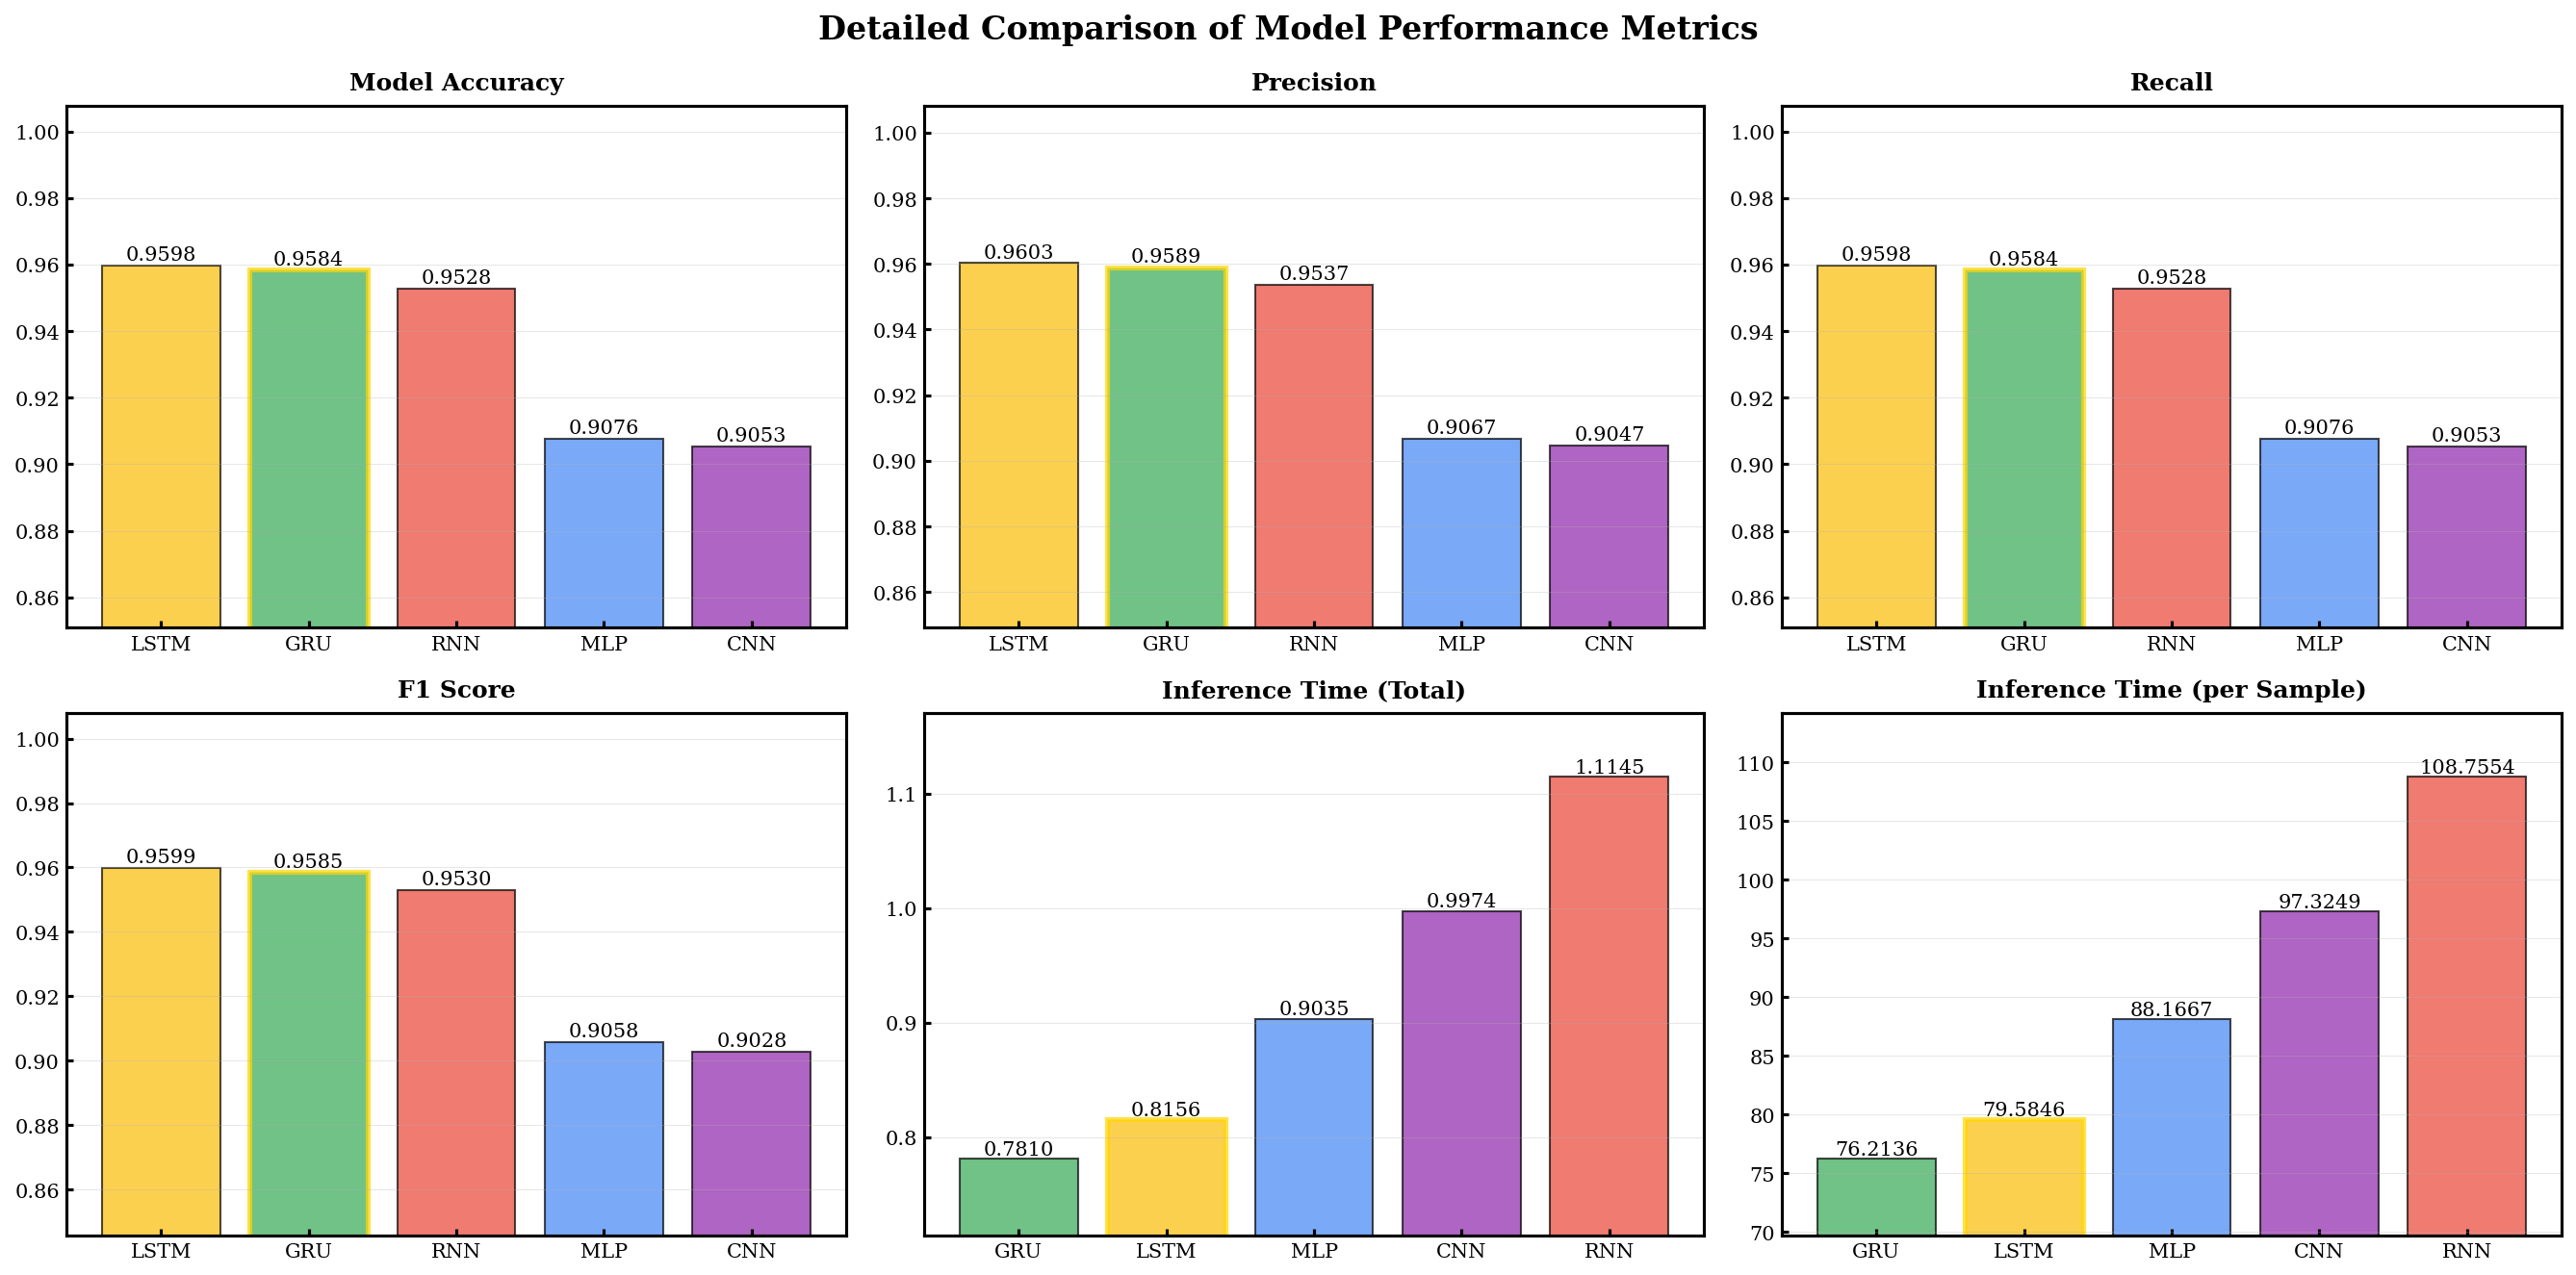


Model Ranking based on Weighted Scores:
1. GRU (Score: 0.9801)
2. LSTM (Score: 0.9793)
3. RNN (Score: 0.7005)
4. MLP (Score: 0.1616)
5. CNN (Score: 0.0703)

Recommended Model: GRU
Accuracy: 0.9584
F1 Score: 0.9585
Inference Time: 0.7810 s
Overall Weighted Score: 0.9801


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

# Set the visual style for publication quality
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = 150

# Define the model selection data
df = pd.DataFrame({
    'model_type': ['MLP', 'GRU', 'LSTM', 'RNN', 'CNN'],
    'accuracy': [0.907592, 0.958431, 0.959797, 0.952771, 0.905347],
    'precision': [0.906731, 0.958862, 0.960258, 0.953681, 0.904712],
    'recall': [0.907592, 0.958431, 0.959797, 0.952771, 0.905347],
    'f1_score': [0.905831, 0.958507, 0.959894, 0.953012, 0.902847],
    'inference_time_total': [0.903532, 0.781037, 0.815583, 1.114525, 0.997386],
    'inference_time_per_sample_us': [88.166693, 76.213635, 79.584554, 108.755375, 97.324916]
})

# Create model ID for easier reference
df['model_id'] = range(len(df))

# Define the model-specific colors for consistent visualization
model_colors = {
    'MLP': '#4285F4',  # Google Blue
    'GRU': '#34A853',  # Google Green
    'LSTM': '#FBBC05',  # Google Yellow
    'RNN': '#EA4335',  # Google Red
    'CNN': '#8E24AA'   # Purple
}

# Create model weights for multi-criteria decision analysis
metric_weights = {
    'accuracy': 0.25,
    'precision': 0.15,
    'recall': 0.15,
    'f1_score': 0.25,
    'inference_time_total': 0.10,
    'inference_time_per_sample_us': 0.10
}

# 1. Create normalized metrics for better comparison
performance_metrics = ['accuracy', 'precision', 'recall', 'f1_score']
time_metrics = ['inference_time_total', 'inference_time_per_sample_us']

# Create a normalized dataframe
df_norm = df.copy()

# Normalize performance metrics (higher is better)
for metric in performance_metrics:
    max_val = df[metric].max()
    min_val = df[metric].min()
    df_norm[f'{metric}_norm'] = (df[metric] - min_val) / (max_val - min_val)

# Normalize time metrics (lower is better)
for metric in time_metrics:
    max_val = df[metric].max()
    min_val = df[metric].min()
    df_norm[f'{metric}_norm'] = 1 - ((df[metric] - min_val) / (max_val - min_val))

# Calculate weighted score for each model
df_norm['weighted_score'] = 0
for metric in performance_metrics + time_metrics:
    df_norm['weighted_score'] += df_norm[f'{metric}_norm'] * metric_weights[metric]

# Get the best model
best_model = df_norm.loc[df_norm['weighted_score'].idxmax()]
print(f"Best Model: {best_model['model_type']} with score {best_model['weighted_score']:.4f}")

# Function to create a detailed bar chart with all metrics and adjusted y-axis
def create_detailed_bar_chart():
    # Set up the figure with multiple subplots - reduced height
    fig, axes = plt.subplots(2, 3, figsize=(18, 9))
    axes = axes.flatten()
    
    # Define metrics and their descriptions
    metric_details = {
        'accuracy': {'title': 'Model Accuracy', 'color': 'skyblue', 'idx': 0},
        'precision': {'title': 'Precision', 'color': 'lightgreen', 'idx': 1},
        'recall': {'title': 'Recall', 'color': 'salmon', 'idx': 2},
        'f1_score': {'title': 'F1 Score', 'color': 'plum', 'idx': 3},
        'inference_time_total': {'title': 'Inference Time (Total)', 'color': 'khaki', 'idx': 4},
        'inference_time_per_sample_us': {'title': 'Inference Time (per Sample)', 'color': 'lightcoral', 'idx': 5}
    }
    
    # Create a bar chart for each metric
    for metric, details in metric_details.items():
        ax = axes[details['idx']]
        
        # For time metrics, we want to visually show that lower is better
        if 'time' in metric:
            # Sort in ascending order for time (lower is better)
            sorted_df = df.sort_values(by=metric)
            colors = [model_colors[model] for model in sorted_df['model_type']]
            
            # Create the bar chart
            bars = ax.bar(sorted_df['model_type'], sorted_df[metric], color=colors, alpha=0.7, edgecolor='black')
            
            # Set y-axis limit to focus on top values - for time metrics, lower is better
            min_val = sorted_df[metric].min()
            max_val = sorted_df[metric].max()
            # Set y-axis to start just below the minimum value to focus on the top
            y_min = max(0, min_val - (max_val - min_val) * 0.2)
            ax.set_ylim(bottom=y_min)
            
        else:
            # Sort in descending order for performance metrics (higher is better)
            sorted_df = df.sort_values(by=metric, ascending=False)
            colors = [model_colors[model] for model in sorted_df['model_type']]
            
            # Create the bar chart
            bars = ax.bar(sorted_df['model_type'], sorted_df[metric], color=colors, alpha=0.7, edgecolor='black')
            
            # Set y-axis limit to focus on top values
            min_val = sorted_df[metric].min()
            max_val = sorted_df[metric].max()
            # Set y-axis to start extremely low to emphasize differences at the top
            y_min = max(0, min_val - (max_val - min_val) * 1.0)
            ax.set_ylim(bottom=y_min)
        
        # Customize the plot with smaller margins
        ax.set_title(details['title'], fontsize=12, fontweight='bold', pad=8)
        ax.tick_params(labelsize=10)
        ax.grid(axis='y', alpha=0.3, linewidth=0.5)
        
        # Highlight the bar for the best model
        best_idx = sorted_df.index[sorted_df['model_type'] == best_model['model_type']].tolist()[0]
        bars[best_idx].set_edgecolor('gold')
        bars[best_idx].set_linewidth(2.5)
        
        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.0005,
                   f'{height:.4f}', ha='center', va='bottom', fontsize=10)
    
    # Add an overall title with reduced padding
    plt.suptitle('Detailed Comparison of Model Performance Metrics', fontsize=16, fontweight='bold', y=0.98)
    
    # Use tighter layout to reduce white space
    plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=2, w_pad=3)
    
    return fig

# Generate only the bar chart with adjusted y-axis
print("\nGenerating Detailed Bar Chart...")
bar_fig = create_detailed_bar_chart()
plt.tight_layout()
plt.show()

# Display model ranking and final recommendation
print("\nModel Ranking based on Weighted Scores:")
ranked_models = df_norm.sort_values(by='weighted_score', ascending=False)
for i, (_, model) in enumerate(ranked_models.iterrows()):
    print(f"{i+1}. {model['model_type']} (Score: {model['weighted_score']:.4f})")

print(f"\nRecommended Model: {best_model['model_type']}")
print(f"Accuracy: {best_model['accuracy']:.4f}")
print(f"F1 Score: {best_model['f1_score']:.4f}")
print(f"Inference Time: {best_model['inference_time_total']:.4f} s")
print(f"Overall Weighted Score: {best_model['weighted_score']:.4f}")

In [9]:
fair_results

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

Description  Accuracy  Base Rate  Selection Rate  \
0                         Ideal Values       NaN        NaN             NaN   
1                GRU GENDER Mitigation  0.511027   0.503513        0.514149   
2            GRU DIR GENDER Mitigation  0.539910   0.500683        0.566354   
3      GRU Reweighed GENDER Mitigation  0.514247   0.503513        0.536495   
4                   GRU AGE Mitigation  0.511027   0.503513        0.514149   
5               GRU DIR AGE Mitigation  0.527810   0.508002        0.545570   
6         GRU Reweighed AGE Mitigation  0.502244   0.503903        0.529957   
7            GRU AGE&GENDER Mitigation  0.511027   0.503513        0.514149   
8        GRU DIR AGE&GENDER Mitigation  0.460578   0.514344        0.576795   
9  GRU Reweighed AGE&GENDER Mitigation  0.465164   0.508197        0.575234   

   Disparate Impact  Statistical Parity Difference  \
0          1.000000                       0.000000   
1          0.799120                      -0.113837   
2          0.743595                      -0.163955   
3          0.793529                      -0.122330   
4          1.144366                       0.072235   
5          1.218521                       0.114419   
6          1.059794                       0.031351   
7          1.061631                       0.035401   
8          0.858329                      -0.098583   
9          0.732106                      -0.181761   

   Between Group Coefficient of Variation  \
0                                0.000000   
1                                0.126726   
2                                0.132084   
3                                0.124893   
4                                0.032971   
5                                0.037994   
6                                0.014873   
7                                0.884068   
8                                0.881751   
9                                0.896810   

   Between Group Generalized Entropy Index  Between Group Theil Index  \
0                                 0.000000                   0.000000   
1                                 0.008030                   0.008105   
2                                 0.008723                   0.008835   
3                                 0.007799                   0.007876   
4                                 0.000544                   0.000534   
5                                 0.000722                   0.000708   
6                                 0.000111                   0.000110   
7                                 0.390788                   0.576335   
8                                 0.388742                   0.571958   
9                                 0.402134                   0.582315   

   Mean Difference  ...  Positive Predictive Value   Power  Precision  \
0         0.000000  ...                        NaN     NaN        NaN   
1        -0.113837  ...                   0.514139  2709.0   0.514139   
2        -0.163955  ...                   0.535837  3110.0   0.535837   
3        -0.122330  ...                   0.516551  2840.0   0.516551   
4         0.072235  ...                   0.514139  2709.0   0.514139   
5         0.114419  ...                   0.532821  2979.0   0.532821   
6         0.031351  ...                   0.505800  2747.0   0.505800   
7         0.035401  ...                   0.514139  2709.0   0.514139   
8        -0.098583  ...                   0.478261  2827.0   0.478261   
9        -0.181761  ...                   0.476845  2811.0   0.476845   

     Recall  Sensitivity  Specificity  Theil Index  True Negative Rate  \
0       NaN          NaN          NaN          NaN            1.000000   
1  0.525000     0.525000     0.496855     0.332078            0.496855   
2  0.606120     0.606120     0.473520     0.278367            0.473520   
3  0.550388     0.550388     0.477594     0.315630            0.477594   
4  0.525000     0.525000     0.496855     0.332078            0.496855   
5  0.572224   

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


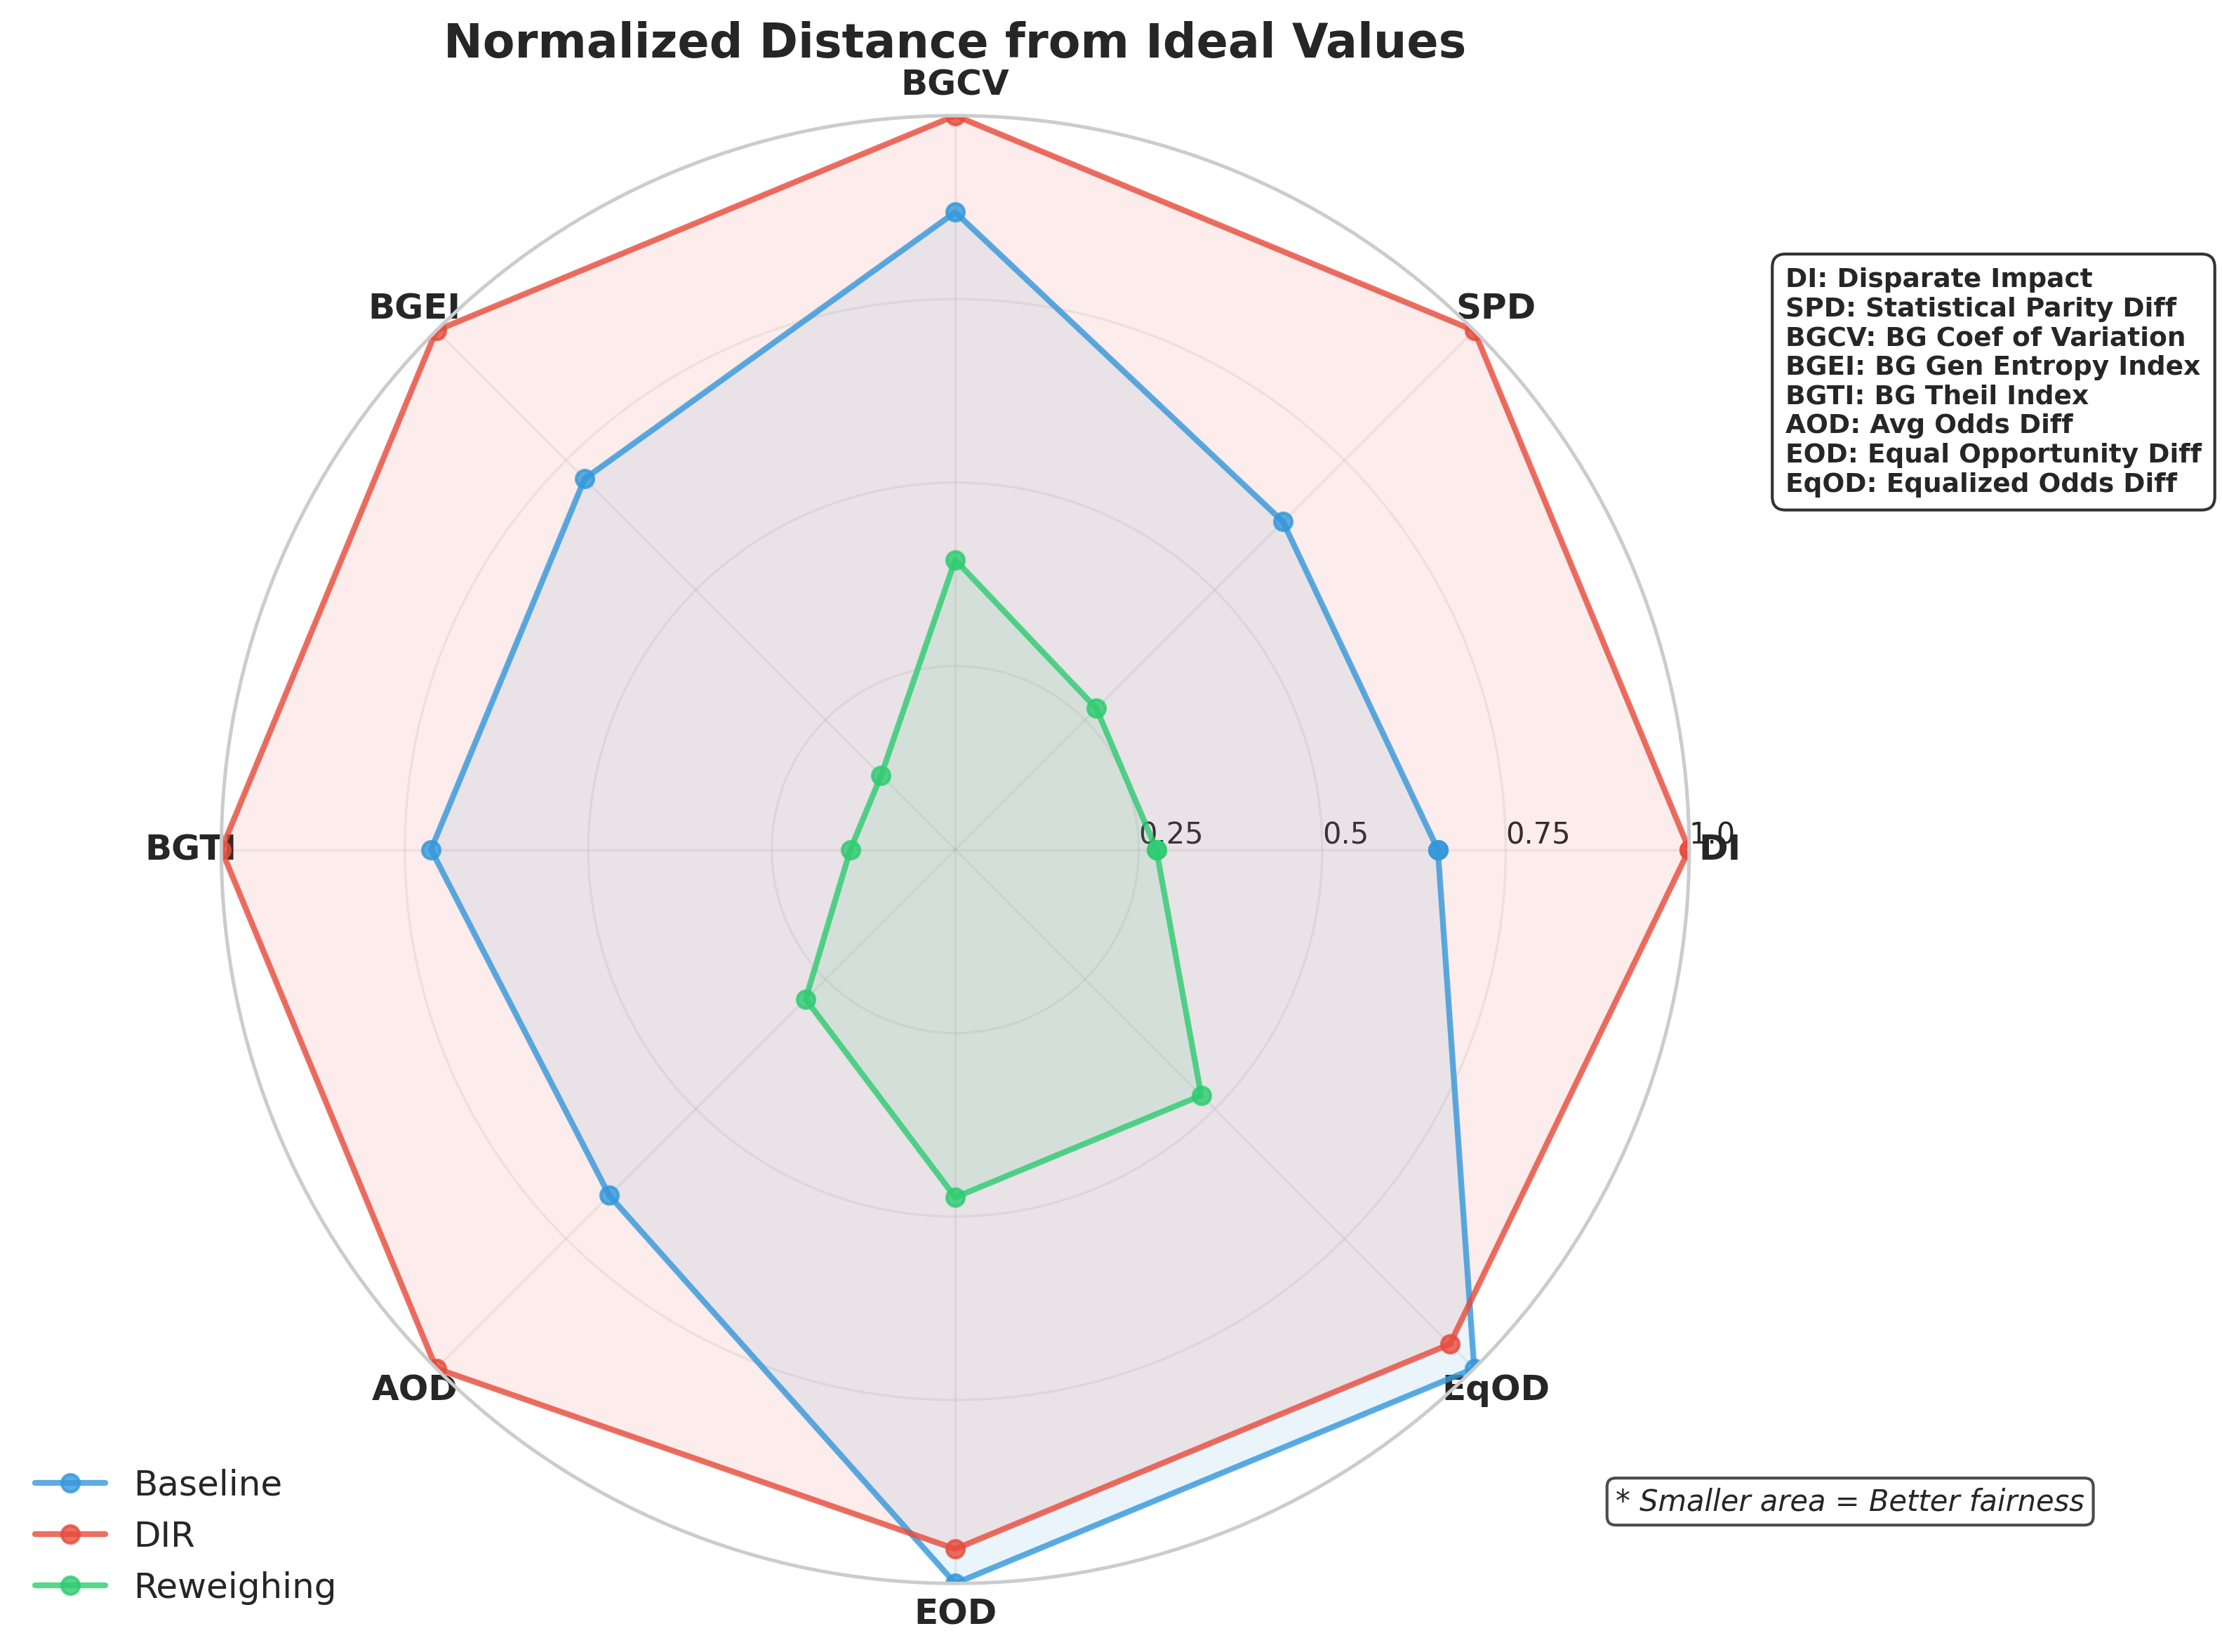

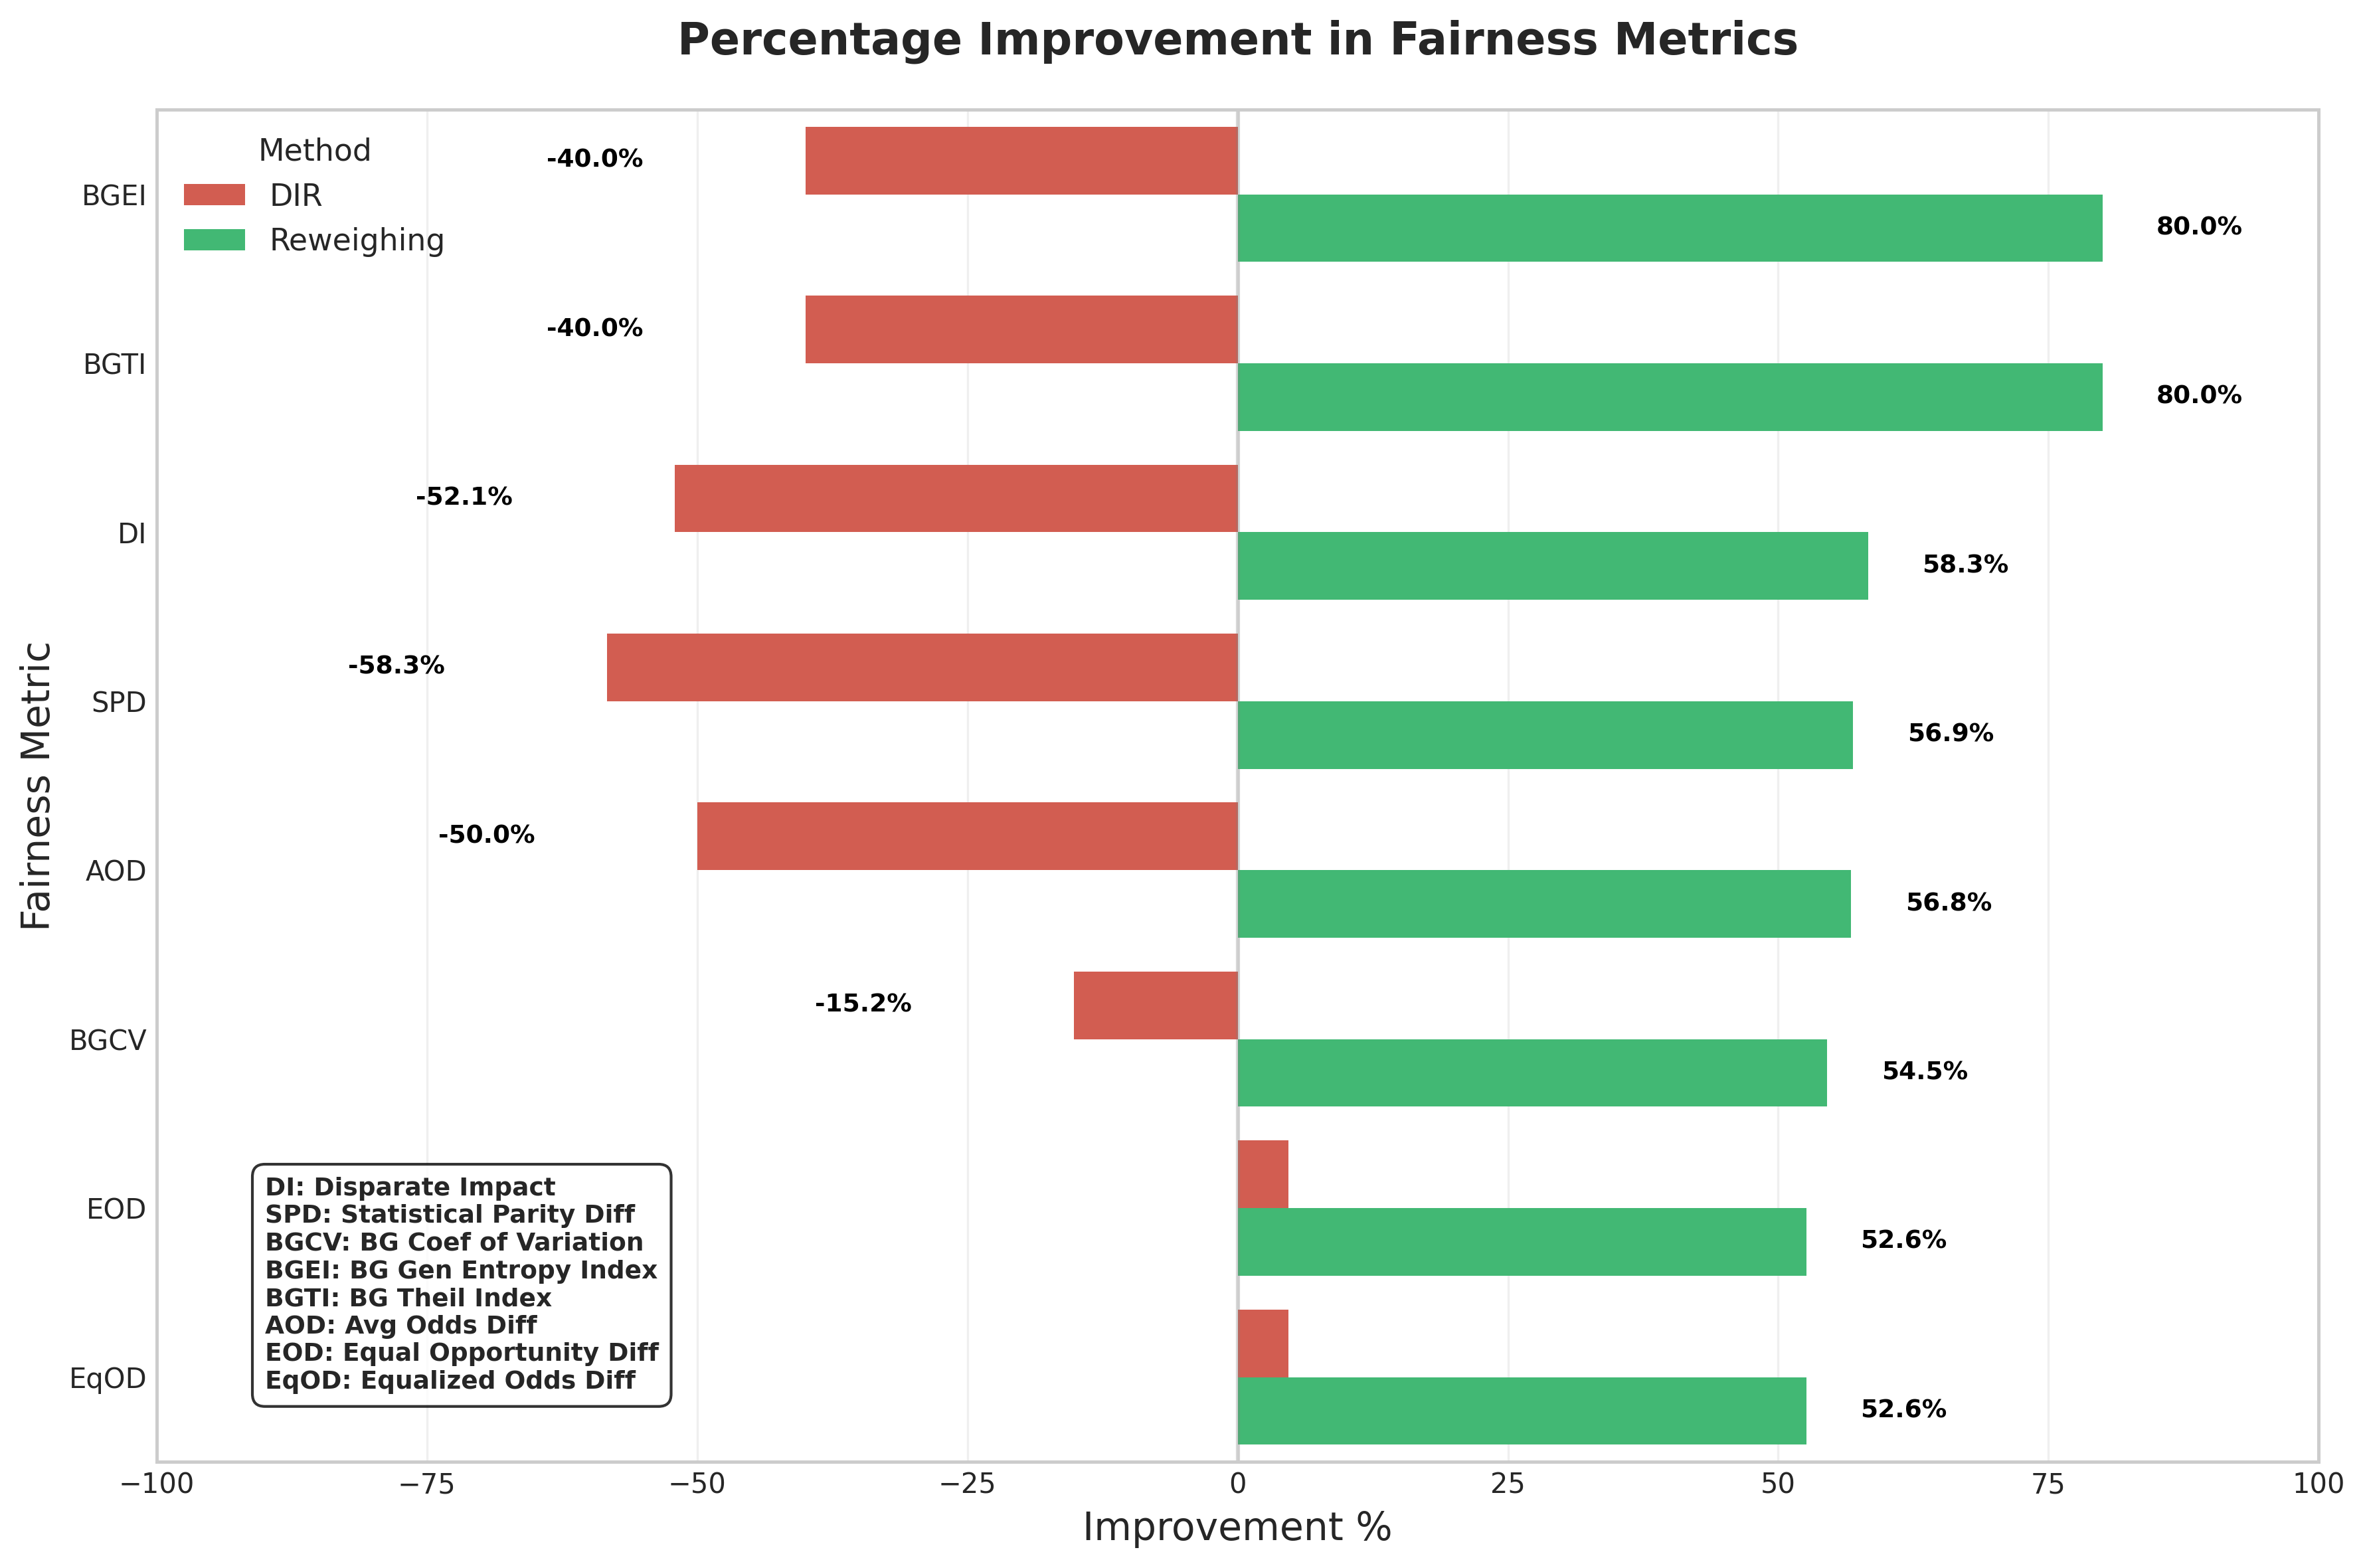

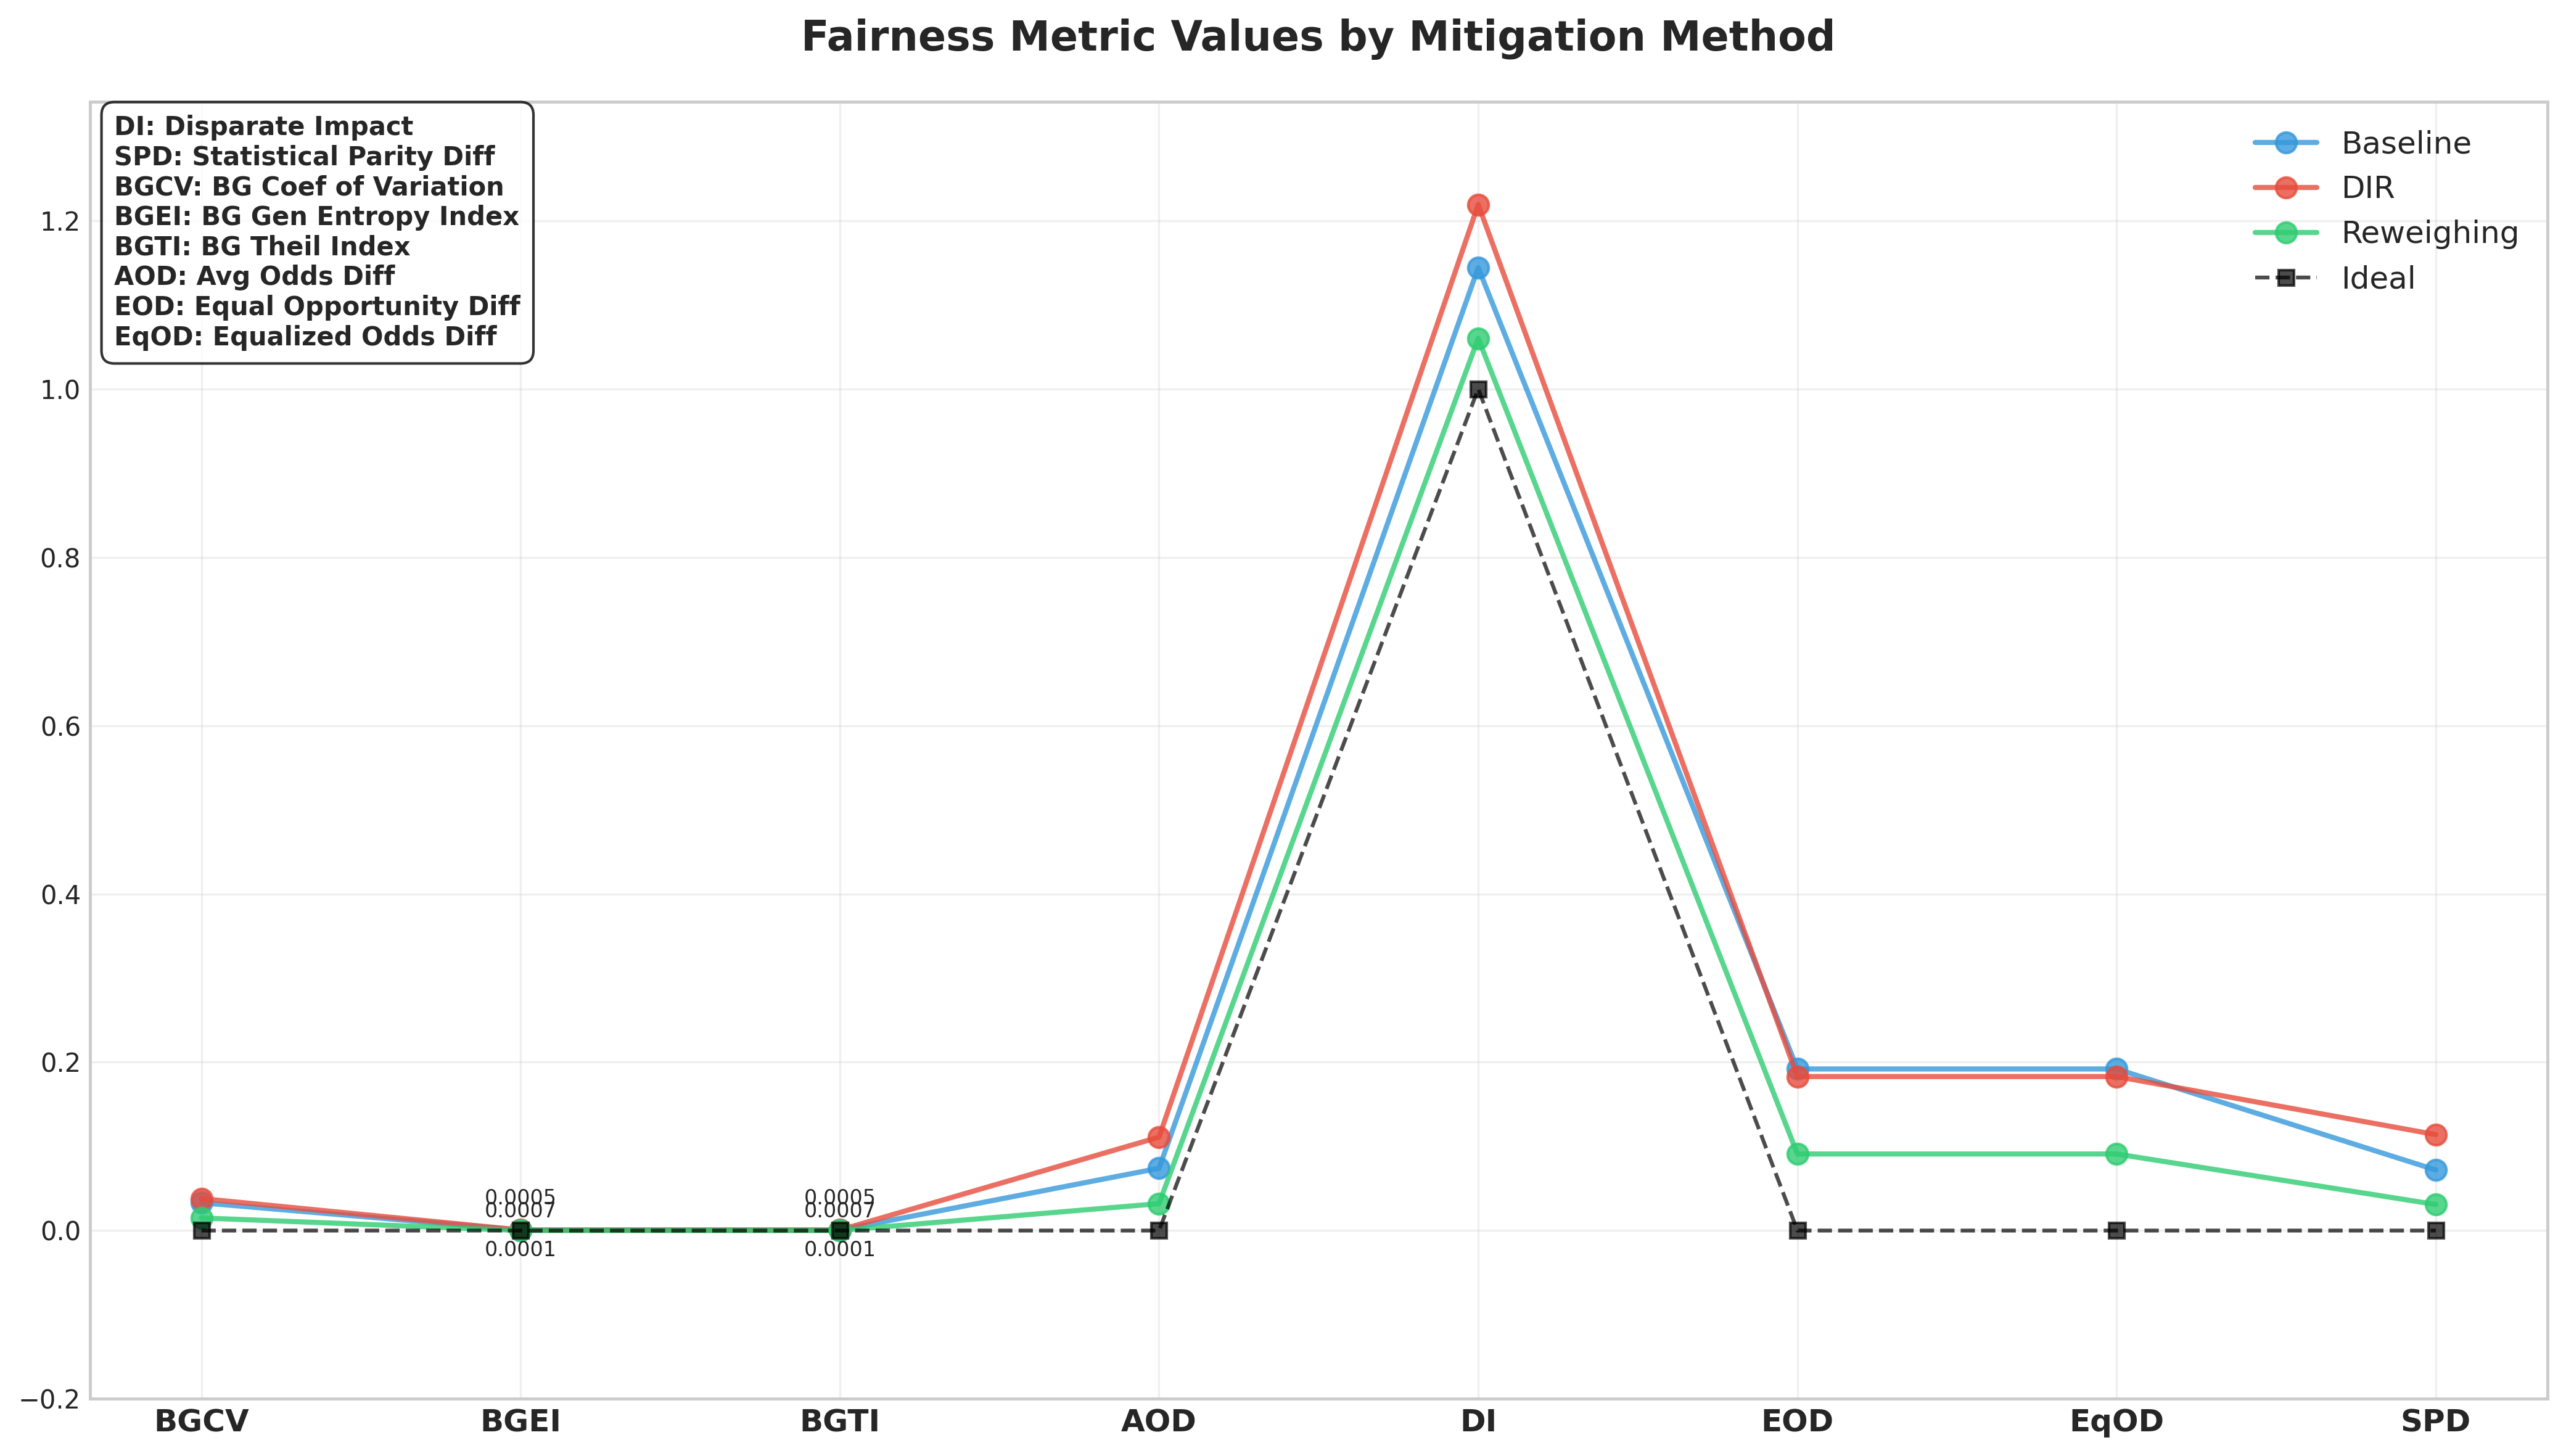

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm, colors
import matplotlib.patheffects as path_effects

# Set the style for publication-quality figures
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.dpi'] = 300

# Create a DataFrame with the age mitigation results
metrics = [
    'Disparate Impact', 
    'Statistical Parity Diff', 
    'BG Coef of Variation', 
    'BG Gen Entropy Index',
    'BG Theil Index', 
    'Avg Odds Diff', 
    'Equal Opportunity Diff', 
    'Equalized Odds Diff'
]

# Short acronyms for better labeling
metric_acronyms = [
    'DI', 
    'SPD', 
    'BGCV', 
    'BGEI',
    'BGTI', 
    'AOD', 
    'EOD', 
    'EqOD'
]

# Ideal values for each metric
ideal_values = {
    'Disparate Impact': 1.0,
    'Statistical Parity Diff': 0.0,
    'BG Coef of Variation': 0.0,
    'BG Gen Entropy Index': 0.0,
    'BG Theil Index': 0.0,
    'Avg Odds Diff': 0.0,
    'Equal Opportunity Diff': 0.0,
    'Equalized Odds Diff': 0.0
}

# Data from the tables
baseline_values = [1.144, 0.072, 0.033, 0.0005, 0.0005, 0.074, 0.192, 0.192]
dir_values = [1.219, 0.114, 0.038, 0.0007, 0.0007, 0.111, 0.183, 0.183]
reweighing_values = [1.060, 0.031, 0.015, 0.0001, 0.0001, 0.032, 0.091, 0.091]

# Calculate distance from ideal for each value
def calculate_distance(value, ideal):
    return abs(value - ideal)

baseline_distance = [calculate_distance(baseline_values[i], ideal_values[metrics[i]]) for i in range(len(metrics))]
dir_distance = [calculate_distance(dir_values[i], ideal_values[metrics[i]]) for i in range(len(metrics))]
reweighing_distance = [calculate_distance(reweighing_values[i], ideal_values[metrics[i]]) for i in range(len(metrics))]

# Improvement percentage from baseline
dir_improvement = [(baseline_distance[i] - dir_distance[i])/baseline_distance[i] * 100 if baseline_distance[i] != 0 else 0 for i in range(len(metrics))]
reweighing_improvement = [(baseline_distance[i] - reweighing_distance[i])/baseline_distance[i] * 100 if baseline_distance[i] != 0 else 0 for i in range(len(metrics))]

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Metric': metrics,
    'Acronym': metric_acronyms,
    'Baseline': baseline_values,
    'DIR': dir_values,
    'Reweighing': reweighing_values,
    'Baseline_Distance': baseline_distance,
    'DIR_Distance': dir_distance,
    'Reweighing_Distance': reweighing_distance,
    'DIR_Improvement': dir_improvement,
    'Reweighing_Improvement': reweighing_improvement
})

# Color definitions for consistent use across plots
colors_dict = {
    'Baseline': '#3498db',  # Blue
    'DIR': '#e74c3c',       # Red
    'Reweighing': '#2ecc71'  # Green
}

# Create a string that explains acronyms - all bold
acronym_legend = "\n".join([f"{a}: {m}" for a, m in zip(metric_acronyms, metrics)])

# PLOT 1: Radar/Spider Plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Number of metrics
N = len(metrics)

# What will be the angle of each axis in the plot
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# For each metric, normalize based on the ideal value and the range of observed values
normalized_values = []
for i, metric in enumerate(metrics):
    ideal = ideal_values[metric]
    # Get all values for this metric
    all_values = [baseline_values[i], dir_values[i], reweighing_values[i]]
    
    # Calculate distances from ideal
    distances = [abs(v - ideal) for v in all_values]
    max_dist = max(distances)
    
    # Normalize so that 0 = ideal, 1 = furthest from ideal
    # This ensures small differences are amplified
    if max_dist > 0:
        norm_baseline = distances[0] / max_dist
        norm_dir = distances[1] / max_dist
        norm_reweighing = distances[2] / max_dist
    else:
        norm_baseline = norm_dir = norm_reweighing = 0
        
    normalized_values.append((norm_baseline, norm_dir, norm_reweighing))

# Separate into lists for each method
normalized_baseline = [v[0] for v in normalized_values]
normalized_dir = [v[1] for v in normalized_values]
normalized_reweighing = [v[2] for v in normalized_values]

# Add the first value again to close the circular graph
normalized_baseline += normalized_baseline[:1]
normalized_dir += normalized_dir[:1]
normalized_reweighing += normalized_reweighing[:1]

# Draw the lines and fill area
ax.plot(angles, normalized_baseline, 'o-', linewidth=2, color=colors_dict['Baseline'], label='Baseline', alpha=0.8)
ax.fill(angles, normalized_baseline, color=colors_dict['Baseline'], alpha=0.1)

ax.plot(angles, normalized_dir, 'o-', linewidth=2, color=colors_dict['DIR'], label='DIR', alpha=0.8)
ax.fill(angles, normalized_dir, color=colors_dict['DIR'], alpha=0.1)

ax.plot(angles, normalized_reweighing, 'o-', linewidth=2, color=colors_dict['Reweighing'], label='Reweighing', alpha=0.8)
ax.fill(angles, normalized_reweighing, color=colors_dict['Reweighing'], alpha=0.1)

# Set labels - use acronyms for cleaner display
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metric_acronyms, fontsize=12, fontweight='bold')

# Set concentric circles to indicate distance
ax.set_yticks([0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0.25', '0.5', '0.75', '1.0'], fontsize=10)
ax.set_rlabel_position(0)
ax.set_ylim(0, 1)

# Add title
ax.set_title("Normalized Distance from Ideal Values", fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=12)

# Add note to explain the radar plot interpretation
ax.text(0.95, 0.05, "* Smaller area = Better fairness", 
        transform=ax.transAxes, fontsize=10, fontstyle='italic',
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))

# Add acronym box (lower position, no "Acronyms" heading, all bold)
plt.figtext(0.85, 0.70, acronym_legend, fontsize=9, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.savefig('fairness_radar_plot.png', dpi=300, bbox_inches='tight')

# PLOT 2: Improvement Percentage Bar Chart
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

improvement_df = pd.DataFrame({
    'Metric': metric_acronyms,  # Use acronyms for cleaner display
    'DIR': dir_improvement,
    'Reweighing': reweighing_improvement
})

# Melt for easier plotting
improvement_melted = pd.melt(improvement_df, id_vars=['Metric'], value_vars=['DIR', 'Reweighing'],
                             var_name='Method', value_name='Improvement %')

# Sort by Reweighing improvement for better visualization
metric_order = improvement_df.sort_values('Reweighing', ascending=False)['Metric'].tolist()
improvement_melted['Metric'] = pd.Categorical(improvement_melted['Metric'], categories=metric_order, ordered=True)

# Plot with specific height to avoid overcrowding
barplot = sns.barplot(
    data=improvement_melted, 
    y='Metric', 
    x='Improvement %', 
    hue='Method', 
    palette={'DIR': colors_dict['DIR'], 'Reweighing': colors_dict['Reweighing']}, 
    ax=ax,
    orient='h'  # Horizontal orientation
)

# Add value labels to the bars
for i, p in enumerate(barplot.patches):
    # Only show value if the bar is long enough
    if p.get_width() > 5 or p.get_width() < -5:
        barplot.annotate(
            f'{p.get_width():.1f}%', 
            (p.get_width() + (5 if p.get_width() > 0 else -15), p.get_y() + p.get_height()/2), 
            ha='left' if p.get_width() > 0 else 'right', 
            va='center',
            fontsize=9,
            fontweight='bold',
            color='black'
        )

ax.set_xlim(-100, 100)  # Allow for negative "improvements"
ax.axvline(x=0, color='gray', linestyle='-', alpha=0.3)  # Add a vertical line at 0
ax.set_title('Percentage Improvement in Fairness Metrics', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Improvement %', fontsize=14)
ax.set_ylabel('Fairness Metric', fontsize=14)
ax.grid(True, alpha=0.3, axis='x')

# Add acronyms box inside the graph in lower left (no "Acronyms" heading, all bold)
ax.text(0.05, 0.05, acronym_legend, fontsize=9, fontweight='bold', transform=ax.transAxes,
        va='bottom', ha='left',
        bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.savefig('fairness_improvement_barplot.png', dpi=300, bbox_inches='tight')

# PLOT 3: Parallel Coordinates Plot with DIR values in center
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)

# Define a custom order that places DI (index 0) and EOD/EqOD (indices 6,7) at the center
# These have the highest DIR values according to dir_values
custom_order = [2, 3, 4, 5, 0, 6, 7, 1]

# Reorder the data based on custom order
reordered_metrics = [metrics[i] for i in custom_order]
reordered_acronyms = [metric_acronyms[i] for i in custom_order]
reordered_baseline = [baseline_values[i] for i in custom_order]
reordered_dir = [dir_values[i] for i in custom_order]
reordered_reweighing = [reweighing_values[i] for i in custom_order]
reordered_ideal = [ideal_values[metrics[i]] for i in custom_order]

# Create data for plotting
methods = ['Baseline', 'DIR', 'Reweighing', 'Ideal']
values_by_method = [reordered_baseline, reordered_dir, reordered_reweighing, reordered_ideal]

# Prepare DataFrame for parallel coordinates plot
data = []
for method_idx, method in enumerate(methods):
    for metric_idx in range(len(reordered_metrics)):
        data.append({
            'Method': method,
            'Metric': reordered_metrics[metric_idx],
            'Acronym': reordered_acronyms[metric_idx],
            'Value': values_by_method[method_idx][metric_idx],
            'Metric_id': metric_idx
        })
parallel_df = pd.DataFrame(data)

# Plot each method line
for method, color in colors_dict.items():
    method_data = parallel_df[parallel_df['Method'] == method].sort_values('Metric_id')
    ax.plot(method_data['Metric_id'], method_data['Value'], 'o-', 
            color=color, linewidth=2, label=method, alpha=0.8, markersize=8)
    
    # Add annotations for very small values
    for idx, row in method_data.iterrows():
        if 'BG Gen Entropy Index' in row['Metric'] or 'BG Theil Index' in row['Metric']:
            ax.annotate(f"{row['Value']:.4f}", 
                      (row['Metric_id'], row['Value']), 
                      textcoords="offset points", 
                      xytext=(0, 10 if method == 'Baseline' else (5 if method == 'DIR' else -10)), 
                      ha='center', fontsize=8)

# Plot ideal line
ideal_data = parallel_df[parallel_df['Method'] == 'Ideal'].sort_values('Metric_id')
ax.plot(ideal_data['Metric_id'], ideal_data['Value'], 's--', color='black', 
        linewidth=1.5, label='Ideal', alpha=0.7, markersize=6)

# Set x-axis ticks and labels
ax.set_xticks(range(len(reordered_metrics)))
ax.set_xticklabels(reordered_acronyms, fontsize=12, fontweight='bold')
plt.xticks(rotation=0)  # No rotation for acronyms

# Set y-axis limits - start from -0.2 as requested
y_max = max(reordered_baseline + reordered_dir + reordered_reweighing) * 1.1
ax.set_ylim(-0.2, y_max)

ax.set_title('Fairness Metric Values by Mitigation Method', fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right', fontsize=12)

# Add acronyms box in top left corner (no "Acronyms" heading, all bold)
ax.text(0.01, 0.99, acronym_legend, fontsize=10, fontweight='bold', transform=ax.transAxes,
        va='top', ha='left',
        bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.savefig('fairness_parallel_plot.png', dpi=300, bbox_inches='tight')